<h1 style="color: #00205b; font-family: 'Georgia';">How Predictive Models Help British Airways Acquire Customers</h1>
<date style="color: #00205b; font-family: 'Georgia';">2024-06-11</date>

# The Goal of the Project

><p>To helps British Airways understand their customer's booking behaviour for the holidays by looking at 50000 records of flight booking data. 
><p>It was part of a job simulation as a Junior Data Scientist at British Airways where I built a predictive model on Random Forest Algoritmn to help British Airways answer two Business Questions:</p><ol style="font-size:18px"><li><em>What are the most important varables contribute to customers booking holidays with British Airways?</em></li><li><em>Is it Viable to Use the given data to Predict Customers booking holidays with British Airways?</em></li>
></ol></p>
>
><p>In this NoteBook  I will demonstrate my data science process for building a predictive model based of Cstomer Flight Booking data.
><p>Follow along and be free to reach out with comments and feedback on my process.</p>
></p>
>




<h2>Project Outline</h2>
For this project, I completed the following tasks:</em>

- [x] Performed Exploratory Data Analysis[EDA].
- [x] Cleaned and Prepared the data for Modeling.
- [x] Dimensionality Reduction
- [x] Feature Encoding
- [x] Performed Feature Scaling.
- [x] Built and Evaluated Model.
- [x] Interpret the model results and answer the Business Questions.

<h2>Project  Dependencies</h2>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Loading the Dataset

In [2]:
data = pd.read_csv("C:/Users/ANAND SHAW/New folder/customer_booking.csv", encoding="ISO-8859-1")

In [3]:
data.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


The `.head()` method allows us to view the first 5 rows in the dataset, this is useful for visual inspection of our columns

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

The `.info()` method gives us a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, we have no null values. It looks like some of these columns should be converted into different data types, e.g. flight_day.

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

Before we compute any statistics on the data, lets do any necessary data conversion

<p>The summary on the columns indicates that there are:</p>
<ul>
<li><strong>14 unique columns</strong></li>
<li><strong>5000 rows</strong></li>
<li><strong>Zero null values (which is good!)</strong></li>
<li><strong>Three unique data types (int64, float64 and object)</strong></li>
</ul>

# Exploratory data analysis **(EDA)**

In [5]:
data.shape

(50000, 14)

<p>The working with <a href="https://cdn.theforage.com/vinternships/companyassets/tMjbs76F526fF5v3G/L3MQ8f6cYSkfoukmz/1667814300249/customer_booking.csv">dataset</a> contains 50000 entries of customer booking data from British Airways. The data contains 13 features(Columns) and 1 target variable, the booking completion status of the customer.</p>

<p>To understand the data, I performed EDA. I used the following techniques to understand the data:</p>

- [x] **Visual inspection of data.**
- [x] **Exploratory Data Visualizations.(Univariate, Bivariate and Multivariate analysis)**


In [6]:
data.tail()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
49995,2,Internet,RoundTrip,27,6,9,Sat,PERPNH,Australia,1,0,1,5.62,0
49996,1,Internet,RoundTrip,111,6,4,Sun,PERPNH,Australia,0,0,0,5.62,0
49997,1,Internet,RoundTrip,24,6,22,Sat,PERPNH,Australia,0,0,1,5.62,0
49998,1,Internet,RoundTrip,15,6,11,Mon,PERPNH,Australia,1,0,1,5.62,0
49999,1,Internet,RoundTrip,19,6,10,Thu,PERPNH,Australia,0,1,0,5.62,0


In [7]:
data.dtypes

num_passengers             int64
sales_channel             object
trip_type                 object
purchase_lead              int64
length_of_stay             int64
flight_hour                int64
flight_day                object
route                     object
booking_origin            object
wants_extra_baggage        int64
wants_preferred_seat       int64
wants_in_flight_meals      int64
flight_duration          float64
booking_complete           int64
dtype: object

In [8]:
data.columns

Index(['num_passengers', 'sales_channel', 'trip_type', 'purchase_lead',
       'length_of_stay', 'flight_hour', 'flight_day', 'route',
       'booking_origin', 'wants_extra_baggage', 'wants_preferred_seat',
       'wants_in_flight_meals', 'flight_duration', 'booking_complete'],
      dtype='object')

In [9]:
data.sample(10)

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
5447,1,Internet,RoundTrip,74,21,12,Mon,CMBSYD,Australia,1,0,1,8.58,0
38332,1,Mobile,RoundTrip,2,5,17,Sun,HKTMEL,Australia,0,0,1,8.83,0
31941,1,Internet,RoundTrip,34,4,8,Fri,HKTKIX,Japan,0,0,0,7.00,0
16142,1,Internet,RoundTrip,7,49,9,Wed,KCHOOL,Australia,1,0,1,8.83,0
16775,1,Internet,RoundTrip,7,88,6,Thu,KIXSGN,Japan,1,0,0,7.00,0
20014,2,Internet,RoundTrip,6,22,10,Thu,MELSGN,Australia,1,1,0,8.83,0
35443,1,Internet,RoundTrip,167,5,7,Mon,BKISYD,Australia,0,0,1,8.58,0
13907,1,Mobile,RoundTrip,44,21,9,Mon,ICNOOL,Australia,1,1,0,8.83,0
11313,1,Internet,RoundTrip,135,38,17,Sat,HDYMEL,Australia,1,0,0,8.83,0
39888,1,Internet,RoundTrip,163,5,16,Thu,KBRKIX,Malaysia,1,0,0,7.00,1


In [10]:
# Used necessary columns
data = data[['sales_channel', 'trip_type', 'purchase_lead', 'length_of_stay', 'flight_hour', 'route', 'booking_origin', 'wants_extra_baggage', 'flight_duration', 'booking_complete']]

In [11]:
data

,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,route,booking_origin,wants_extra_baggage,flight_duration,booking_complete
0,Internet,RoundTrip,262,19,7,AKLDEL,New Zealand,1,5.52,0
1,Internet,RoundTrip,112,20,3,AKLDEL,New Zealand,0,5.52,0
2,Internet,RoundTrip,243,22,17,AKLDEL,India,1,5.52,0
3,Internet,RoundTrip,96,31,4,AKLDEL,New Zealand,0,5.52,0
4,Internet,RoundTrip,68,22,15,AKLDEL,India,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...
49995,Internet,RoundTrip,27,6,9,PERPNH,Australia,1,5.62,0
49996,Internet,RoundTrip,111,6,4,PERPNH,Australia,0,5.62,0
49997,Internet,RoundTrip,24,6,22,PERPNH,Australia,0,5.62,0
49998,Internet,RoundTrip,15,6,11,PERPNH,Australia,1,5.62,0


In [12]:
# Check Null Values
data.isnull().sum()

sales_channel          0
trip_type              0
purchase_lead          0
length_of_stay         0
flight_hour            0
route                  0
booking_origin         0
wants_extra_baggage    0
flight_duration        0
booking_complete       0
dtype: int64

In [13]:
(data.isnull().sum()/len(data))*100

sales_channel          0.0
trip_type              0.0
purchase_lead          0.0
length_of_stay         0.0
flight_hour            0.0
route                  0.0
booking_origin         0.0
wants_extra_baggage    0.0
flight_duration        0.0
booking_complete       0.0
dtype: float64

In [14]:
data.sample(10)

,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,route,booking_origin,wants_extra_baggage,flight_duration,booking_complete
39893,Mobile,RoundTrip,101,5,9,KBRMEL,Australia,0,8.83,0
43890,Internet,RoundTrip,401,6,6,CTSDMK,Thailand,1,8.67,0
24765,Internet,RoundTrip,185,29,7,SGNSYD,Australia,1,8.58,0
28036,Internet,RoundTrip,17,3,14,ICNOOL,South Korea,1,8.83,0
47649,Internet,RoundTrip,389,6,6,ICNSYD,Japan,0,8.58,0
997,Internet,RoundTrip,179,23,10,AKLKUL,New Zealand,1,8.83,0
16080,Internet,RoundTrip,21,18,5,KCHMEL,Malaysia,1,8.83,1
3146,Internet,RoundTrip,19,431,12,CANMEL,Australia,1,8.83,0
26684,Internet,RoundTrip,21,3,18,CGKHND,Indonesia,1,7.57,0
9678,Internet,RoundTrip,60,88,16,DMKOOL,Thailand,1,8.83,1


In [15]:
# Convert Datatype
data['flight_duration'] = data['flight_duration'].astype('int64')

In [16]:
data.booking_origin.value_counts(normalize=True).nlargest(20)

booking_origin
Australia         0.35744
Malaysia          0.14348
South Korea       0.09118
Japan             0.07770
China             0.06774
Indonesia         0.04738
Taiwan            0.04154
Thailand          0.04060
India             0.02540
New Zealand       0.02148
Singapore         0.02088
United States     0.00912
Vietnam           0.00776
Macau             0.00608
Hong Kong         0.00590
Philippines       0.00532
United Kingdom    0.00346
Brunei            0.00334
Cambodia          0.00264
(not set)         0.00168
Name: proportion, dtype: float64

In [17]:
data[data['booking_origin'] == "(not set)"]

,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,route,booking_origin,wants_extra_baggage,flight_duration,booking_complete
252,Internet,RoundTrip,14,17,10,AKLKUL,(not set),1,8,1
1147,Internet,RoundTrip,40,17,0,AKLKUL,(not set),0,8,0
4547,Internet,RoundTrip,29,38,20,CKGTRZ,(not set),1,4,0
6311,Internet,RoundTrip,197,42,1,COKMEL,(not set),1,8,0
6518,Internet,RoundTrip,248,24,22,COKOOL,(not set),1,8,0
...,...,...,...,...,...,...,...,...,...,...
45921,Internet,RoundTrip,60,6,11,HGHHKT,(not set),1,5,0
46007,Internet,RoundTrip,163,6,1,HGHSIN,(not set),0,5,0
46043,Internet,RoundTrip,5,6,14,HGHTRZ,(not set),1,5,1
46847,Internet,RoundTrip,46,6,16,HNDPEN,(not set),1,7,1


In [18]:
#Removing the (not set) country
data = data[data['booking_origin'] != "(not set)"]

In [19]:
# Replacing with the Right countries names
data['booking_origin'] = data['booking_origin'].replace("Svalbard & Jan Mayen", "Svalbard")
data['booking_origin'] = data['booking_origin'].replace("Myanmar (Burma)", "Myanmar")

In [20]:
# prefix='Svalbard'
# find_country = [x for x in data['booking_origin'] if x.startswith(prefix)]
# find_country2 = [x for x in data['booking_origin'] if x.startswith("Myanmar")]

# print(find_country)
# print(find_country2)

In [21]:
#Displaying the duplicated rows and total duplicated rows
print(f"Total Duplicate values in our data is: {len(data[data.duplicated])}")
print("<-->"*15)
data[data.duplicated()]

Total Duplicate values in our data is: 882
<--><--><--><--><--><--><--><--><--><--><--><--><--><--><-->


,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,route,booking_origin,wants_extra_baggage,flight_duration,booking_complete
196,Internet,RoundTrip,206,17,13,AKLKUL,Malaysia,1,8,0
316,Internet,RoundTrip,206,17,13,AKLKUL,Malaysia,1,8,0
384,Internet,RoundTrip,206,17,13,AKLKUL,Malaysia,1,8,0
456,Internet,RoundTrip,30,85,15,AKLKUL,Malaysia,1,8,1
513,Internet,RoundTrip,109,20,4,AKLKUL,Singapore,1,8,0
...,...,...,...,...,...,...,...,...,...,...
49910,Internet,RoundTrip,24,6,7,PENTPE,Malaysia,1,4,0
49924,Internet,RoundTrip,7,6,9,PENTPE,Malaysia,1,4,1
49934,Internet,RoundTrip,2,6,3,PENTPE,Malaysia,0,4,0
49944,Internet,RoundTrip,2,6,3,PENTPE,Malaysia,0,4,0


In [22]:
data.shape

(49916, 10)

In [23]:
## Drop all Duplicate rows
data.drop_duplicates(inplace=True)

In [24]:
data.shape

(49034, 10)

In [25]:
data.sample(7)

,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,route,booking_origin,wants_extra_baggage,flight_duration,booking_complete
22599,Internet,RoundTrip,251,17,6,PENPER,Australia,1,5,0
35955,Internet,RoundTrip,45,5,17,CGKTPE,Indonesia,1,4,0
31620,Internet,RoundTrip,342,4,18,HANSYD,Vietnam,1,8,0
33762,Internet,RoundTrip,18,4,17,MAATPE,India,1,4,1
17353,Internet,RoundTrip,40,31,9,KTMMFM,Macau,1,4,0
15235,Internet,RoundTrip,71,61,8,JHBKTM,Malaysia,1,4,1
42266,Internet,RoundTrip,413,6,5,AKLKUL,Malaysia,0,8,0


In [26]:
# Find total Categorical columns in my dataset
categorical_feature = {feature for feature in data.columns if data[feature].dtypes == 'O'}
print(f'Count of Categorical feature: {len(categorical_feature)}')
print("---"*50)
print(f'Categorical feature are:\n {categorical_feature}')

Count of Categorical feature: 4
------------------------------------------------------------------------------------------------------------------------------------------------------
Categorical feature are:
 {'sales_channel', 'booking_origin', 'trip_type', 'route'}


In [27]:
#Finding the total numerical columns in my dataset
numerical_feature = data.select_dtypes(include=["int64","float64"]).columns
print(f'Count of numerical_feature: {len(numerical_feature)}')
print("---"*50)
print(f'numerical_feature are:\n {numerical_feature}')

Count of numerical_feature: 6
------------------------------------------------------------------------------------------------------------------------------------------------------
numerical_feature are:
 Index(['purchase_lead', 'length_of_stay', 'flight_hour', 'wants_extra_baggage',
       'flight_duration', 'booking_complete'],
      dtype='object')


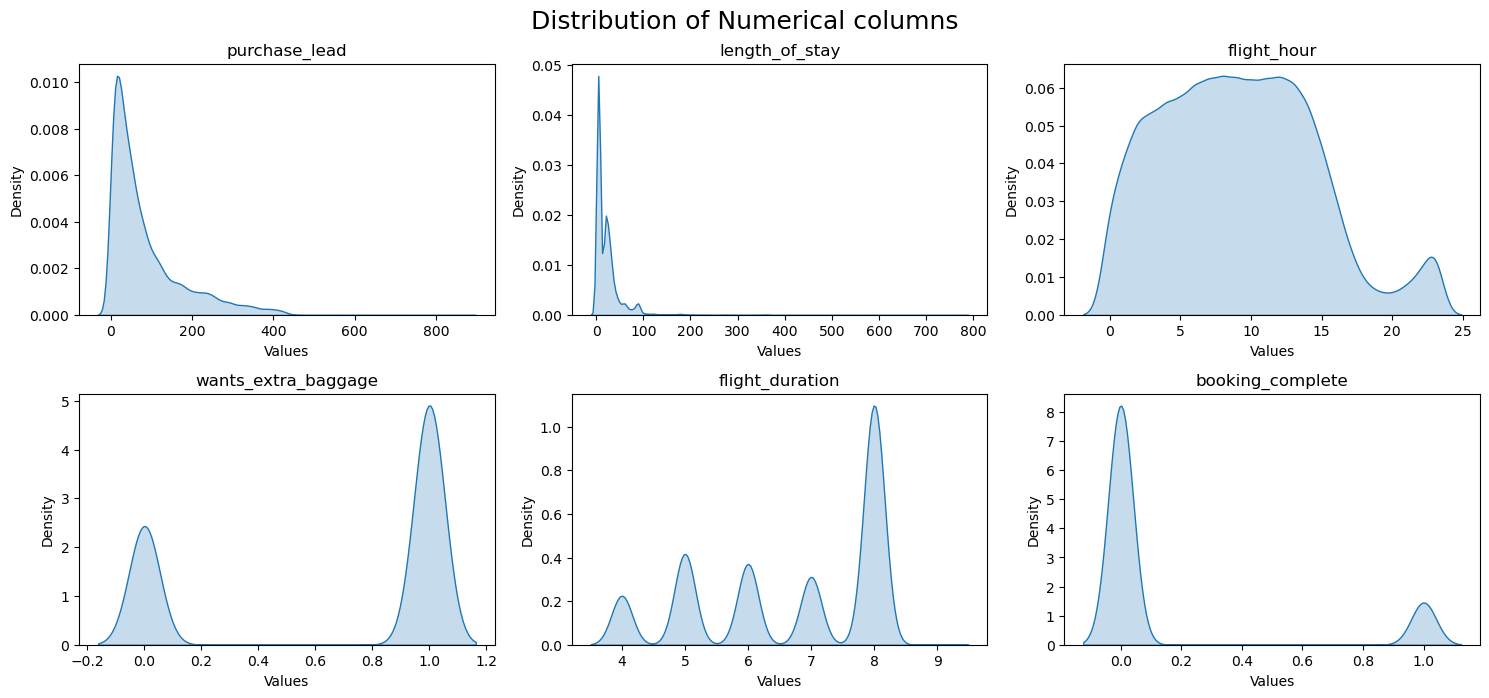

In [28]:
feature_names = data.select_dtypes(include='int64').columns
# Plotting KDE
plt.figure(figsize=(15, 10))
for i, feature in enumerate(feature_names):
    
    plt.subplot(3, 3, i+1)
    sns.kdeplot(data[feature], fill=True)
    plt.title(feature)
    plt.xlabel('Values')
    plt.ylabel('Density')
plt.suptitle('Distribution of Numerical columns', fontsize=18)
plt.tight_layout()
plt.show()

In [29]:
data.describe()

,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,flight_duration,booking_complete
count,49034.000000,49034.000000,49034.000000,49034.000000,49034.000000,49034.000000
mean,84.628299,23.101746,9.071726,0.668455,6.679345,0.150039
std,90.351664,33.890810,5.412047,0.470773,1.424597,0.357113
min,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000
25%,21.000000,5.000000,5.000000,0.000000,5.000000,0.000000
50%,51.000000,17.000000,9.000000,1.000000,7.000000,0.000000
75%,115.000000,28.000000,13.000000,1.000000,8.000000,0.000000
max,867.000000,778.000000,23.000000,1.000000,9.000000,1.000000


<h4>Some Highlights from The summary statistics</h4>

### `Some outliers present in out data columns like` ***purchase_lead***, ***length_of_stay***

**Purchase_lead** number of days between travel date and booking date average **84** and The **standard deviation** of **90.35 days** is quite large compared to the **mean of 84.63 days.** This suggests that the **purchase lead** times vary greatly among the customers. 
- High variability implies that there are **significant differences in how early or late customers book their flights relative to the departure date.** - The slightly difference between mean and **50% percentile** which is **median** so **Data is Right Skewed.**
- The **75% percentile value 115** and the **maximum** number of days between travel date and booking date is ***867*** **so Outliers present in our data.**

**length_of_stay** the minimum number of days spend at destination **0**, and the **average** day spend at destination is **23. 
- the **75%** people an Number of days spend at destination **28 days.**
- The difference between mean and **50% percentile** which is **median** so **Data is Right Skewed.**
- The **75%** percentile and the **maximum** value gap is large so **Outliers** present in out data.

**flight_hour** the average hour of flight departure is **9.0**, The **standard deviation** of **5.41 hours** indicates how much the flight hours deviate, on **average**, from the **mean of 9.07 hours.**
- A moderate standard deviation like **5.41** **suggests** that while there is **some spread in the flight hours,**
- it is not overly large. **It means that most flight hours are within a range of **5.41 hours** **from the mean**, both above and below.
- The **50%** of the flight hour departure is **13** and maximum is **23** like **close to 1 day** 
- Approximately **68%** of the flight hour values lie within **one standard deviation** of the mean (9.07 ± 5.41), which is between **3.66 hours** and **14.48 hours**.
- Approximately **95%** lie within **two standard deviations** (9.07 ± 2 * 5.41), which is between **-1.75 hours** (not possible for flight hours, so it would start from 0) and **19.89 hours.**
- This level of variability suggests that there is a noticeable but not extreme difference in the **lengths of flights.**

**flight_duration** Low variability, indicated by a standard deviation of **1.42 hours** and mean is 6.68 its indicate that the **flight duration** value **clusterd around the mean**

- Most of the time **75%** flight duration is **8**

- The maximum flight_duration value is **9** and **50%** flight duration is **7**.



https://www.scribbr.com/statistics/interquartile-range/ Boxplot

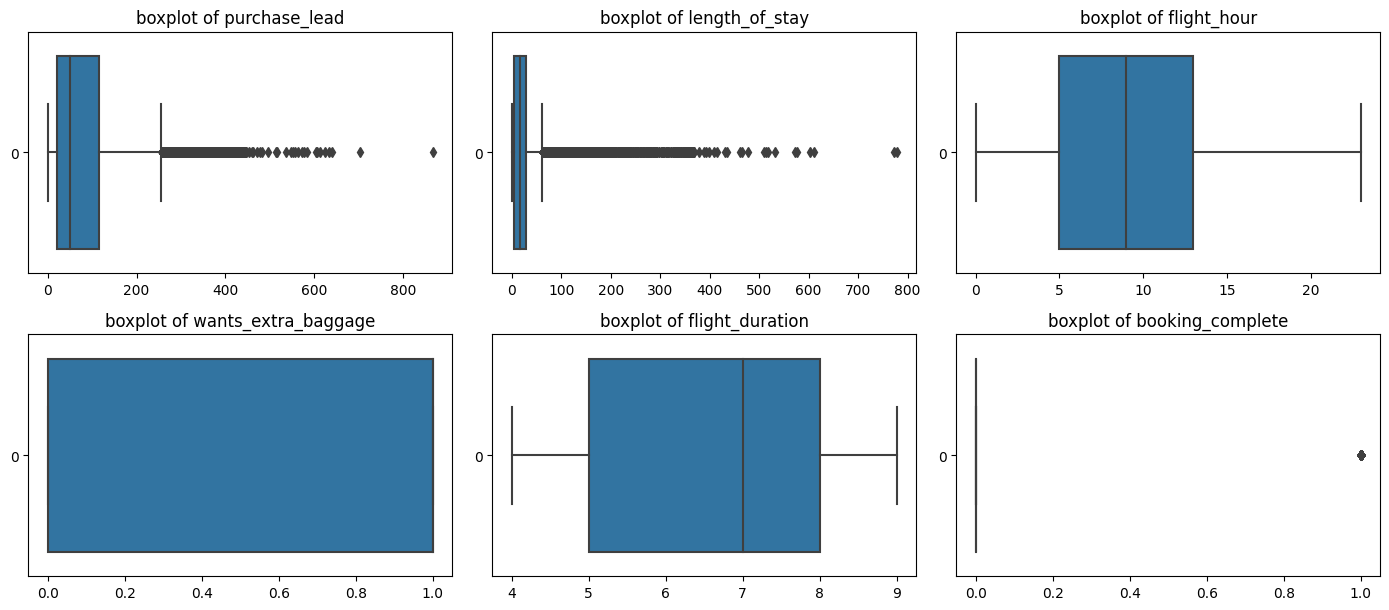

In [21]:
features = data.select_dtypes(include=["float",'int64'])

plt.figure(figsize=(14, 9))
for i, feature in enumerate(features, start=1):
    plt.subplot(3, 3, i)
    sns.boxplot(data[feature],orient='h')
    plt.title(f"boxplot of {feature}")
    
plt.tight_layout()
plt.show()

In [49]:
# Removing Outliers Using IQR

for col in ['purchase_lead', 'length_of_stay']:
    
    percentile25_q1 = data[col].quantile(0.25)
    percentile75_q3 = data[col].quantile(0.75)
    
    IQR = percentile75_q3-percentile25_q1
    
    lower_bound = percentile25_q1 - 1.5 * IQR
    upper_bound = percentile75_q3 + 1.5 * IQR
    
    
    data = data[(data[col]>=lower_bound) & (data[col]<=upper_bound)]

In [50]:
data.describe()

,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,flight_duration,booking_complete
count,42283.000000,42283.000000,42283.000000,42283.000000,42283.000000,42283.000000
mean,67.991108,16.302509,9.073481,0.658279,6.637608,0.150983
std,62.662901,14.614312,5.379722,0.474292,1.430609,0.358036
min,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000
25%,20.000000,5.000000,5.000000,0.000000,5.000000,0.000000
50%,47.000000,6.000000,9.000000,1.000000,7.000000,0.000000
75%,97.000000,25.000000,13.000000,1.000000,8.000000,0.000000
max,256.000000,65.000000,23.000000,1.000000,9.000000,1.000000


In [15]:
data

,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,route,booking_origin,wants_extra_baggage,flight_duration,booking_complete
1,Internet,RoundTrip,112,20,3,AKLDEL,New Zealand,0,5,0
2,Internet,RoundTrip,243,22,17,AKLDEL,India,1,5,0
3,Internet,RoundTrip,96,31,4,AKLDEL,New Zealand,0,5,0
4,Internet,RoundTrip,68,22,15,AKLDEL,India,1,5,0
5,Internet,RoundTrip,3,48,20,AKLDEL,New Zealand,1,5,0
...,...,...,...,...,...,...,...,...,...,...
49995,Internet,RoundTrip,27,6,9,PERPNH,Australia,1,5,0
49996,Internet,RoundTrip,111,6,4,PERPNH,Australia,0,5,0
49997,Internet,RoundTrip,24,6,22,PERPNH,Australia,0,5,0
49998,Internet,RoundTrip,15,6,11,PERPNH,Australia,1,5,0


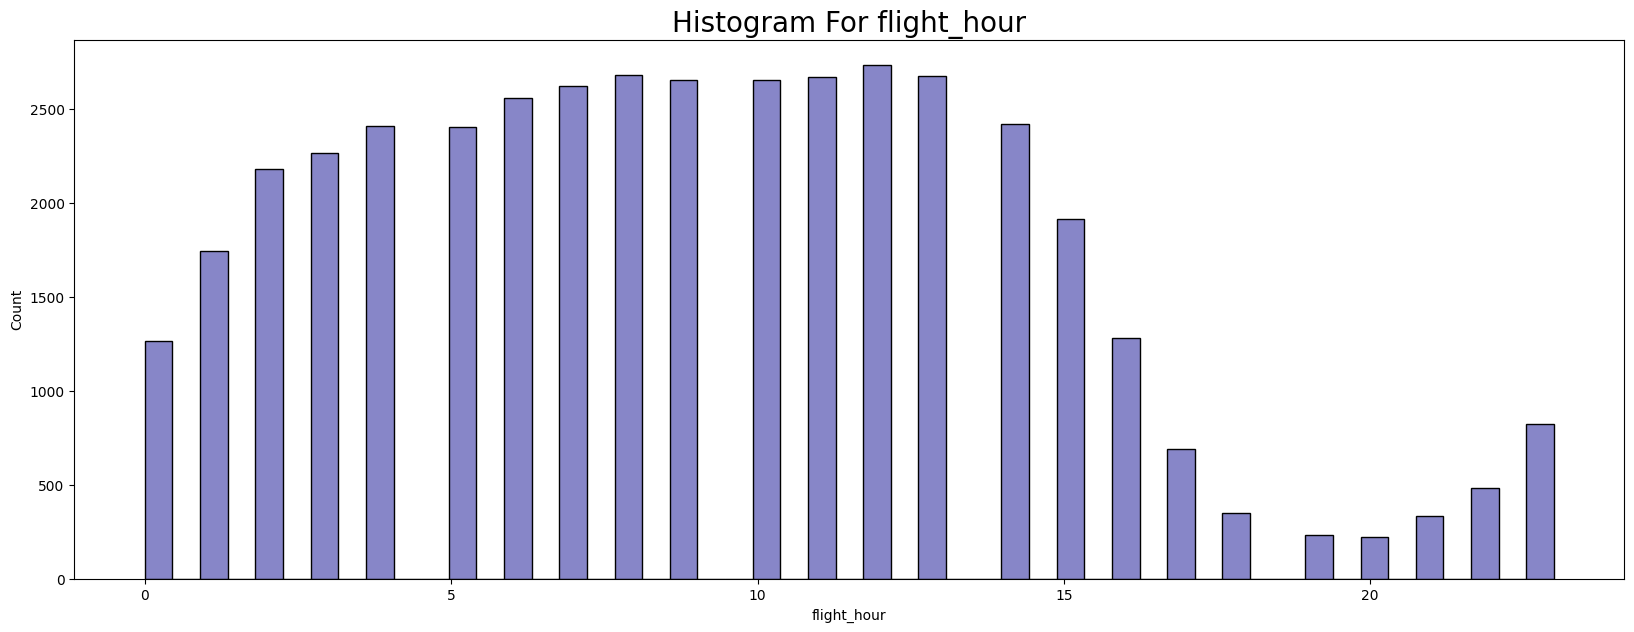

In [184]:
plt.figure(figsize=(20,7))
sns.histplot(data['flight_hour'],kde=False,color='#5F5DB6',edgecolor="black")
plt.title('Histogram For flight_hour', size=20)
plt.show()

### Maximum flight departure times are between **8** and **12**

In [185]:
data.purchase_lead.value_counts().nlargest(15)

purchase_lead
1     640
2     600
6     579
7     546
13    540
5     531
8     526
12    525
4     523
9     514
21    512
20    507
3     506
10    497
18    495
Name: count, dtype: int64

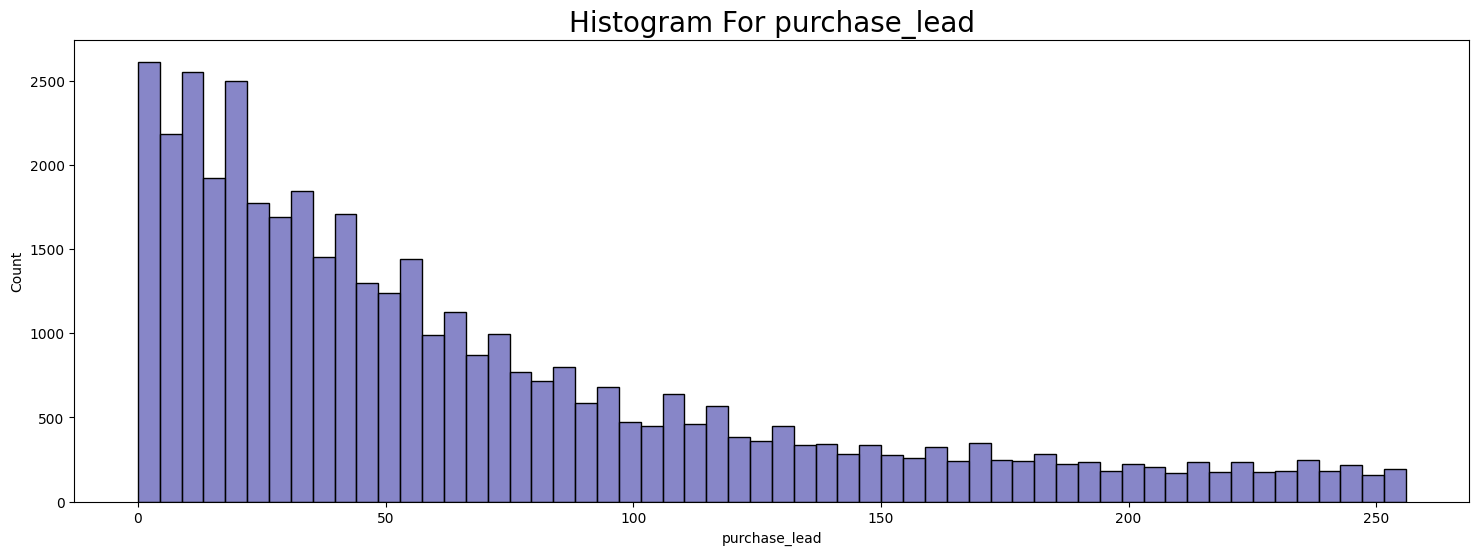

In [186]:
plt.figure(figsize=(18,6))
axc = sns.histplot(data['purchase_lead'],kde=False,color='#5F5DB6',edgecolor="black")
plt.title('Histogram For purchase_lead', size=20)
plt.show()

### The minimum **number of days between travel date and booking date is** **1** to **13**, and rest of the people maximum between travel date and booking date is **50** to **60** Days

In [187]:
data.length_of_stay.value_counts().nlargest(20)

length_of_stay
6     6784
5     6503
4     5145
3     2632
17    1632
21    1263
18    1222
22    1169
20    1167
19    1149
29     973
23     869
2      828
28     796
30     744
27     718
24     718
31     603
25     601
26     560
Name: count, dtype: int64

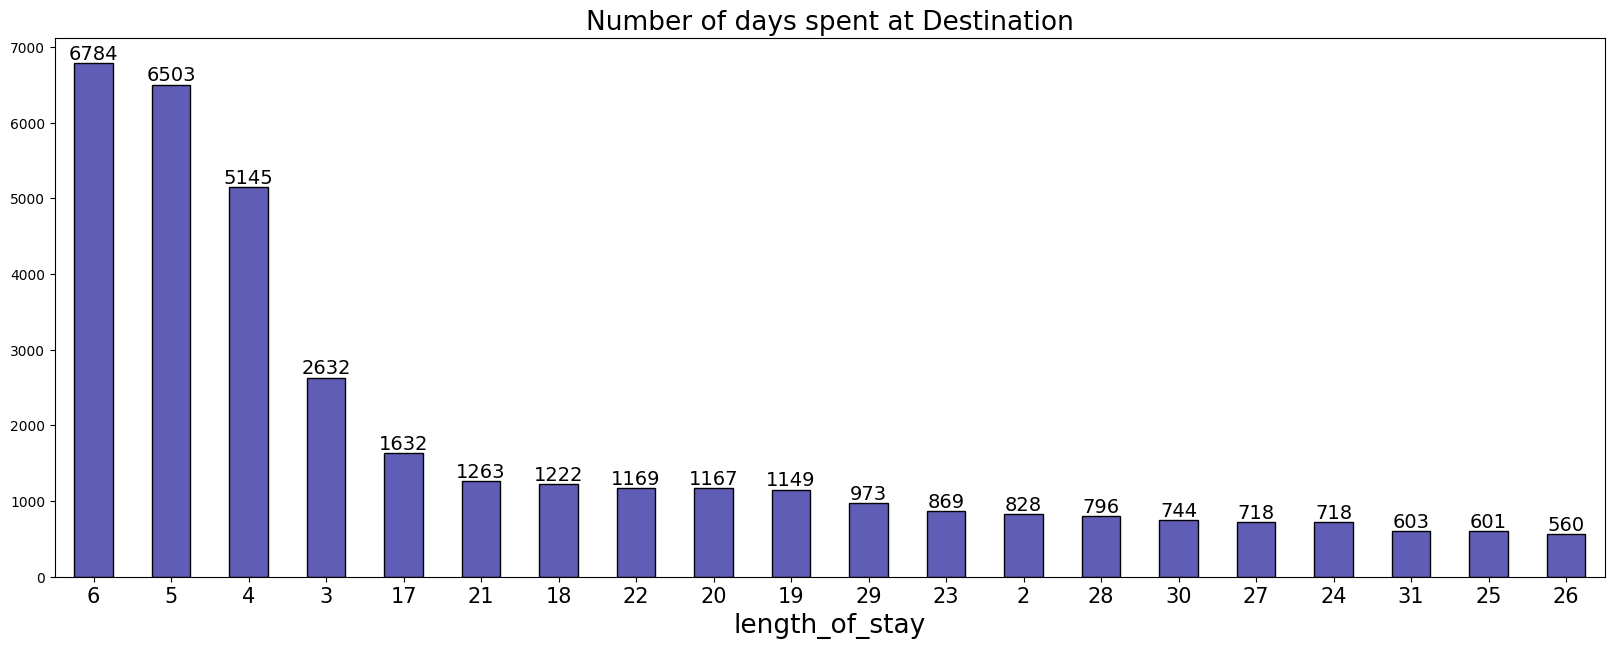

In [23]:
plt.figure(figsize=(20,7))
axcz = data.length_of_stay.value_counts().nlargest(20).plot(kind='bar',edgecolor='black',color='#5F5DB6')
axcz.bar_label(axcz.containers[0], fontsize=14)
plt.title("Number of days spent at Destination",fontsize=19)
plt.xticks(rotation=0,fontsize=15)
plt.xlabel("length_of_stay",fontsize=19)
plt.show()

### Most of the People spend at destination is **4** to **6** days and rest of the people stayed **23** to **25** days.


In [23]:
data['booking_complete'].corr(data['length_of_stay'])

-0.09245715807045937

In [24]:
data.sales_channel.value_counts()

sales_channel
Internet    37520
Mobile       4763
Name: count, dtype: int64

## **Donut charts are used to show the `proportions of categorical data, with the size of each piece representing the proportion of each category.`**

Text(0.5, 1.0, 'Count of sales_channel')

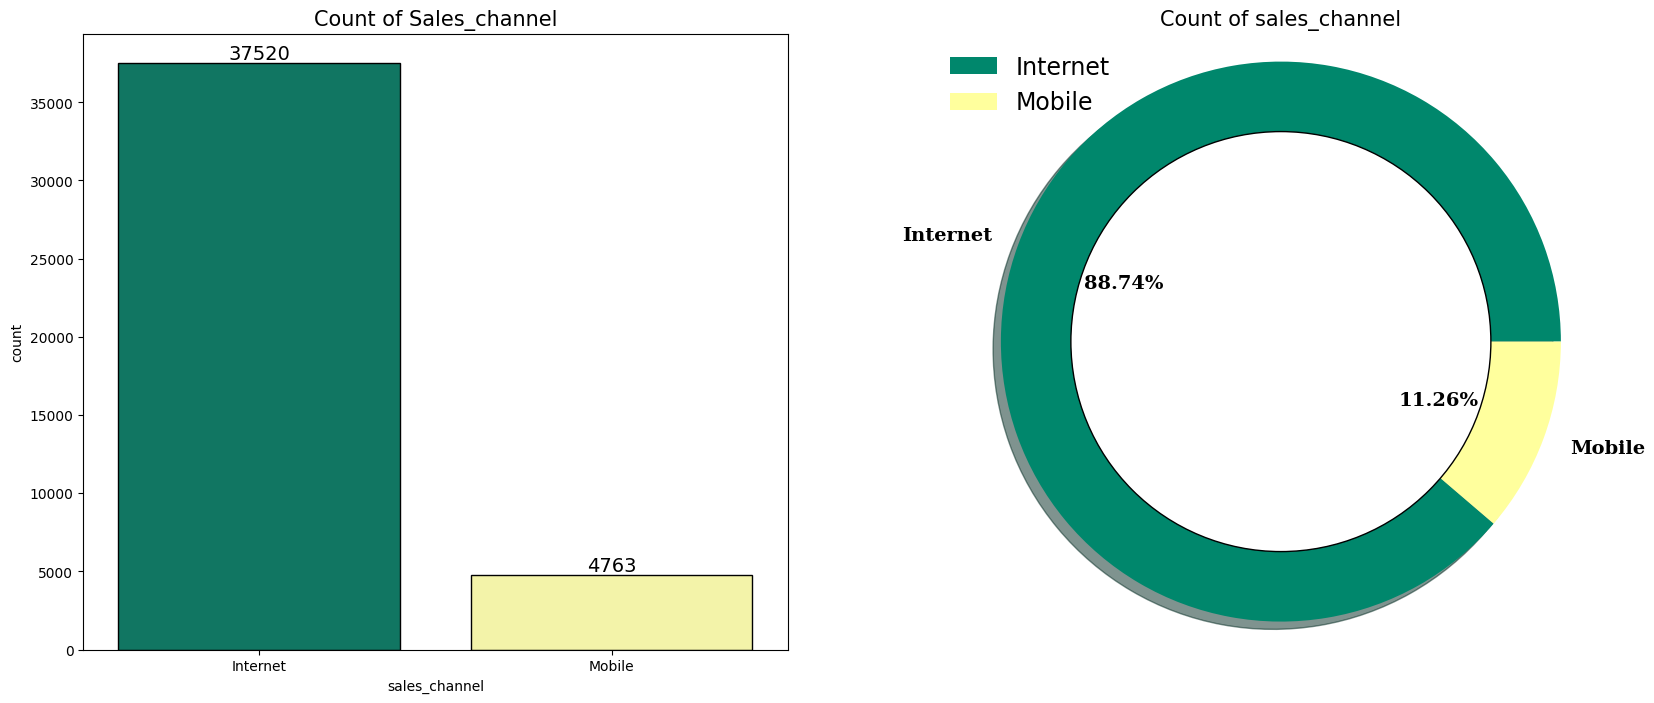

In [35]:
# abels = ['Internet', 'Mobile']
color = ["#00876c","#ffff9d"]
plt.figure(figsize=(20,8))
plt.subplot(1, 2, 1)
ax=sns.countplot(x='sales_channel',data=data,palette=color, alpha=1, edgecolor="black")
ax.bar_label(ax.containers[0],fontsize=14)
# plt.legend(abels)
plt.title('Count of Sales_channel',size=15)

    
plt.subplot(1, 2, 2)  

Internet, Mobile = data.sales_channel.value_counts()
y = [Internet, Mobile]
explode = [0, 0.0]
labels = ['Internet', 'Mobile']

plt.pie(y, labels=labels,colors=color, explode=explode,autopct='%1.2f%%',textprops={'color': 'black','fontsize':14,'weight': 'bold','family': 'serif'},shadow=True)
plt.axis('equal')
plt.legend(labels,loc="upper left",framealpha=False,fontsize=17)
circle = plt.Circle(xy=(0, 0), radius=0.75, facecolor='white', edgecolor='black')
plt.gca().add_artist(circle)
plt.title('Count of sales_channel', size=15)

### **89%** booking has been done through **Internet**

https://www.learnui.design/tools/data-color-picker.html#single

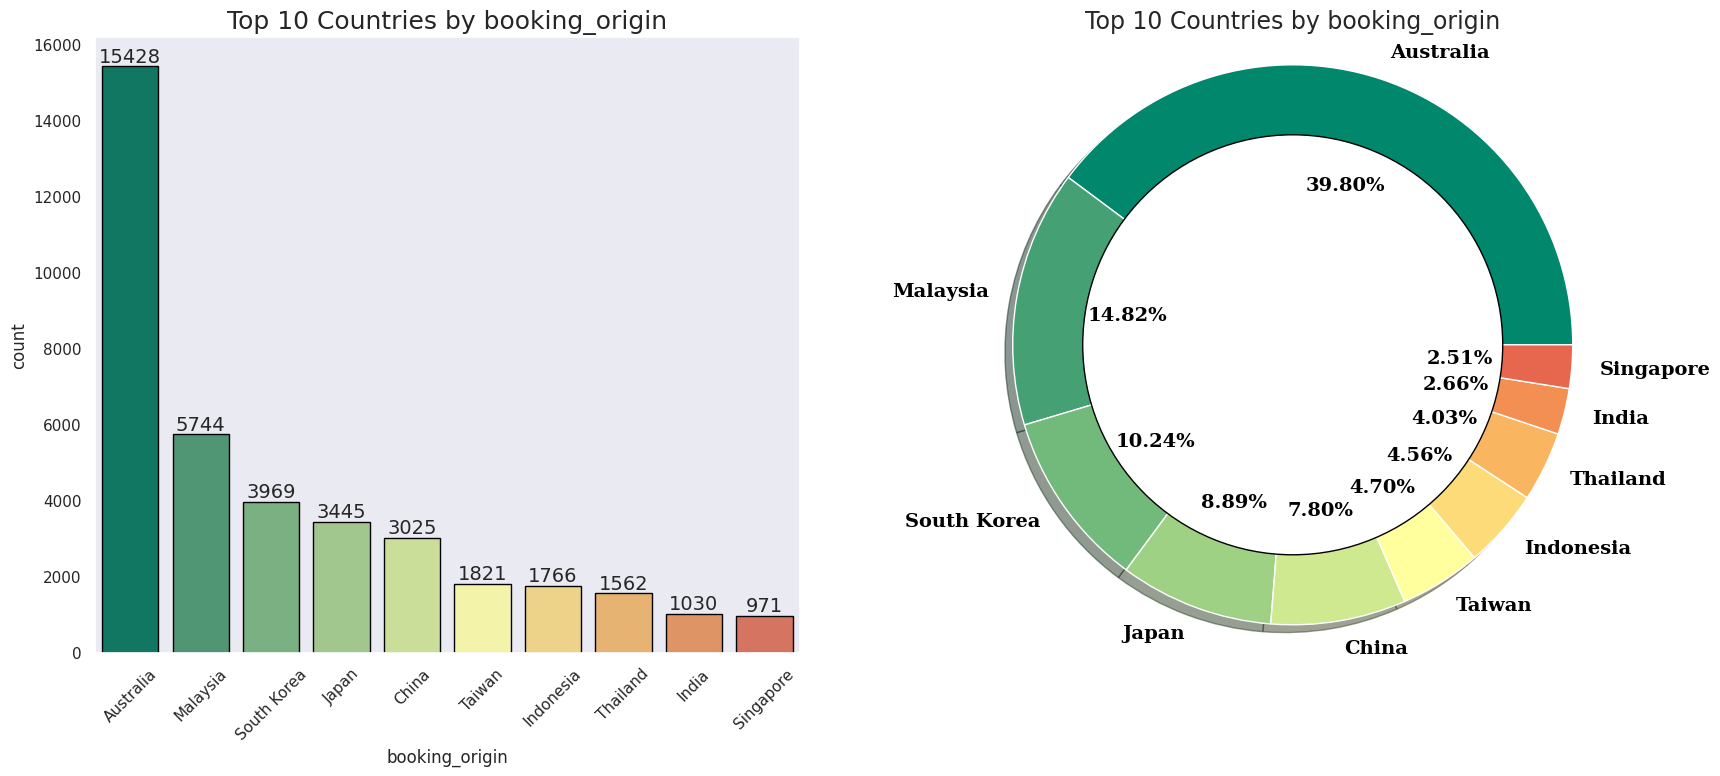

In [39]:
# fill_color = ["#003f5c", "#2f4b7c","#007d79", "#665191", "#a05195", "#d45087", "#f95d6a", "#ff7c43", "#ffa600","#800074"]
fill_color = ["#00876c","#45a074","#72b97c","#9fd184","#cee98f","#ffff9d","#fedb79","#fab560","#f38f52","#e7674e"]
sns.set_theme(style="dark")
plt.figure(figsize=(20, 8))


plt.subplot(1, 2, 1)
count_data = data['booking_origin'].value_counts().nlargest(10)

abc = sns.countplot(x='booking_origin', data=data,palette=fill_color, order=count_data.index,edgecolor="black")
abc.bar_label(abc.containers[0], fontsize=14)
plt.title('Top 10 Countries by booking_origin', size=18)
# plt.legend(labels)
plt.xticks(rotation=45)



plt.subplot(1, 2, 2)
counts = data['booking_origin'].value_counts().nlargest(10)
labels = counts.index
plt.pie(counts, labels=labels,colors = fill_color, autopct='%1.2f%%',textprops={'color': 'black','fontsize':14,'weight': 'bold','family': 'serif'},shadow=True)
plt.axis('equal')

# I'm Creating a Donut chart.
circle = plt.Circle((0, 0), radius=0.75, facecolor='white', edgecolor='black')
plt.gca().add_artist(circle)
plt.title('Top 10 Countries by booking_origin', size=17)
plt.show()

### **39.80%** bookings have come from **Australia** and **14.82** bookings have come from **Malaysia.**

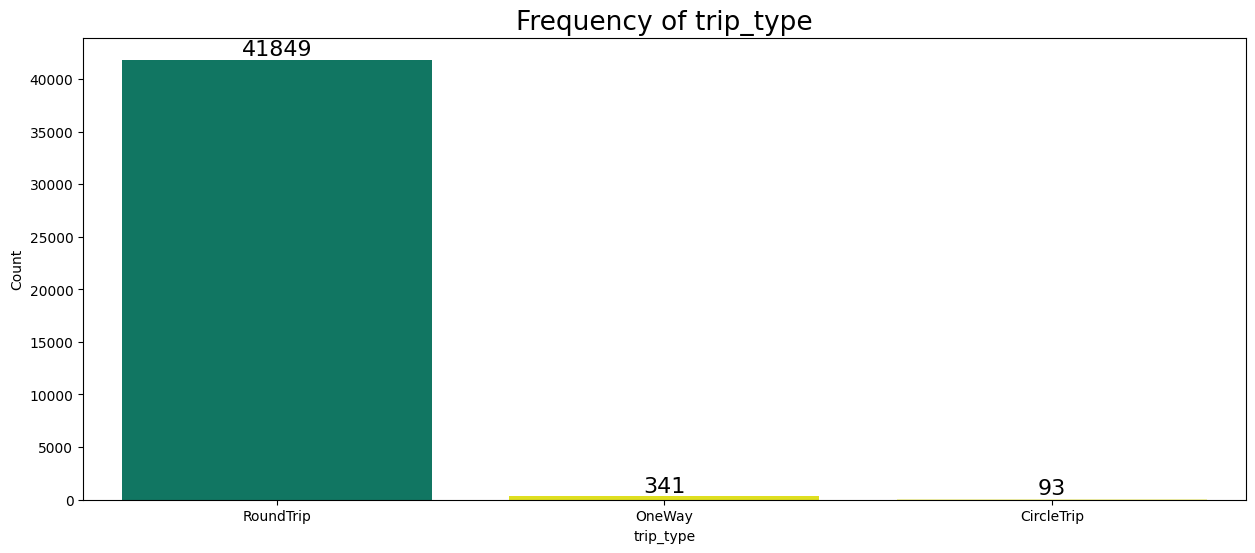

In [36]:
fill_c = ["#00876c","yellow","#ffff9d"]
plt.figure(figsize=(15,6))
variable = sns.countplot(x="trip_type",data=data,palette=fill_c,order=data['trip_type'].value_counts().sort_values(ascending=False).index)
variable.bar_label(variable.containers[0], fontsize=16)
plt.title('Frequency of trip_type',fontsize=19)
plt.ylabel("Count")
plt.grid(False)
plt.show()

#### in the above graph maximum travellers booked **RoundTrip**, travellers travel one place to another back to the starting destination usually via same route.

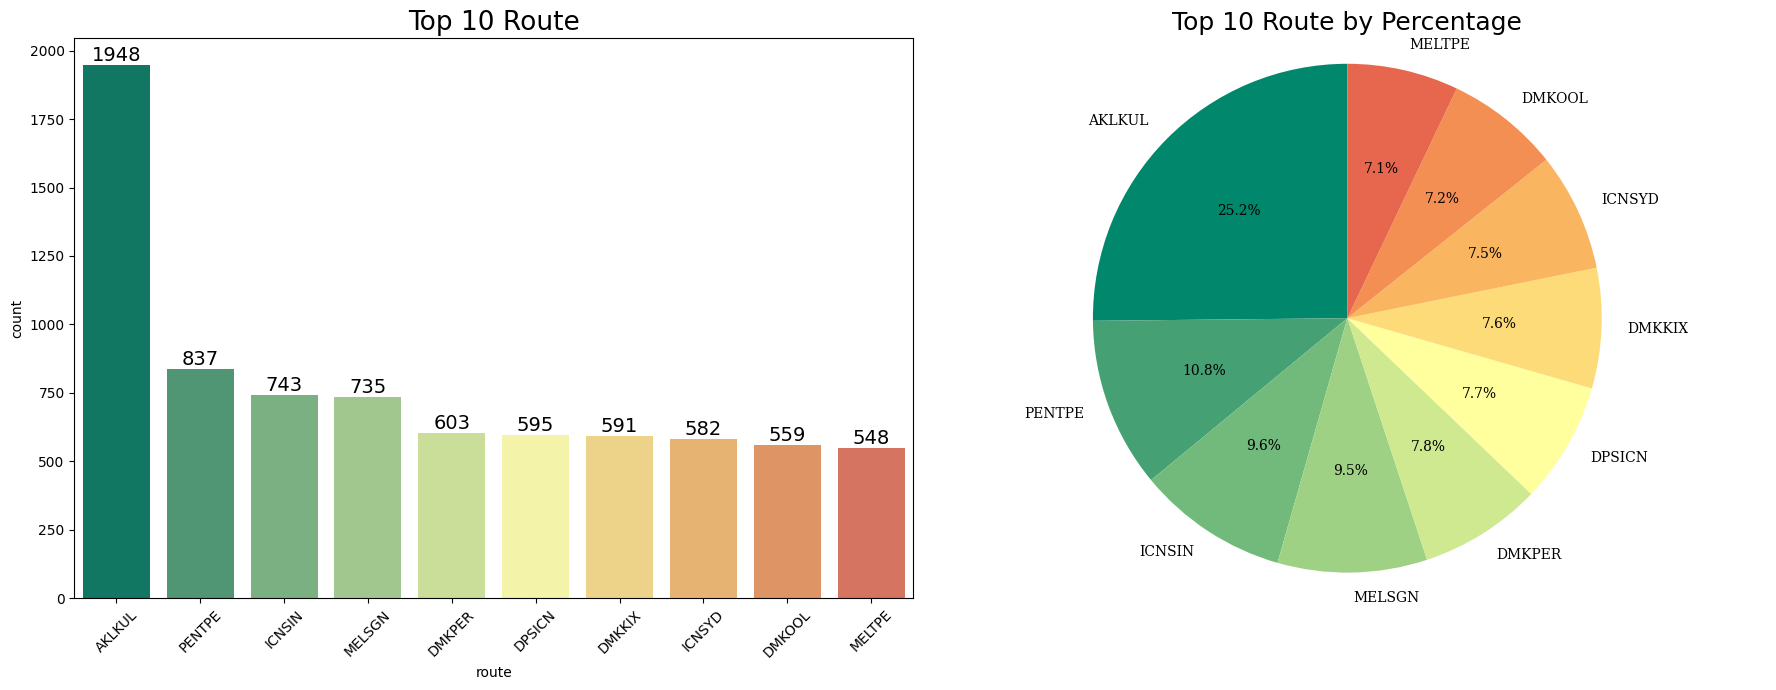

In [100]:
fill_c = ["#00876c","#45a074","#72b97c","#9fd184","#cee98f","#ffff9d","#fedb79","#fab560","#f38f52","#e7674e"]
# colorcode = ["#440154FF", "#481567FF", "#482677FF", "#453781FF", "#404788FF", "#404788FF", "#39568CFF", "#33638DFF", "#2D708EFF", "#287D8EFF", "#238A8DFF", "#1F968BFF", "#20A387FF", "#29AF7FFF", "#3CBB75FF", "#55C667FF", "#73D055FF", "#95D840FF", "#B8DE29FF", "#DCE319FF","#FDE725FF"]

plt.figure(figsize=(18, 7))
plt.subplot(1, 2, 1)


count_data = data['route'].value_counts().nlargest(10)


ax1=sns.countplot(x='route', data=data,palette=fill_c, order=count_data.index)
ax1.bar_label(ax1.containers[0], fontsize=14)
plt.title("Top 10 Route",fontsize=19)
plt.xticks(rotation=45)


plt.subplot(1, 2, 2)
plt.pie(count_data, labels=count_data.index,colors=fill_c, autopct='%1.1f%%', startangle=90, textprops={'color': 'black','family': 'serif'})
plt.title('Top 10 Route by Percentage',fontsize=18)
plt.axis('equal')
plt.tight_layout()
plt.show()

### In the above graph Maximum flight route is **AKLKUL** then other routes

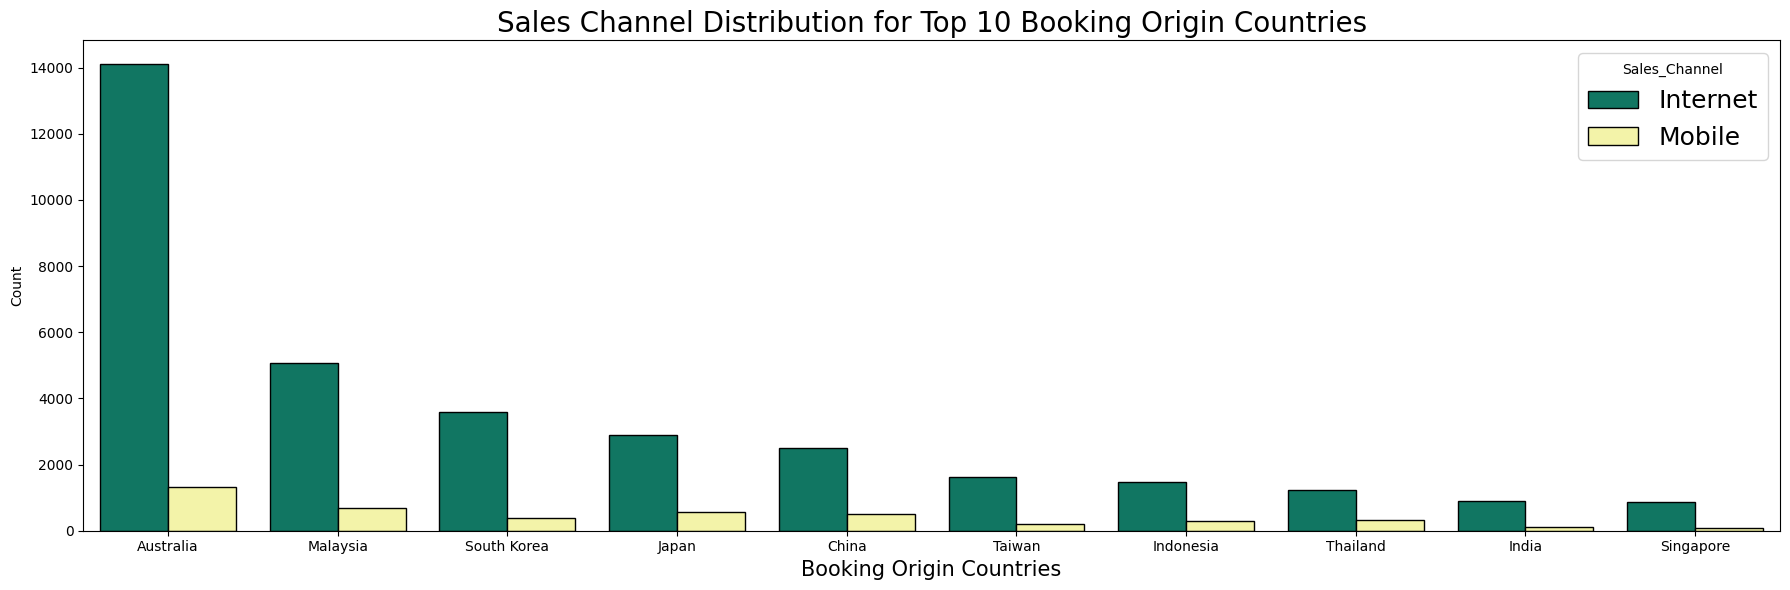

In [72]:
add_color = ["#00876c","#ffff9d"]

# top 10 booking origin countries by count
top_countries = data['booking_origin'].value_counts().nlargest(10).index

# Filter the data for only top 10 countries
df_filtered = data[data['booking_origin'].isin(top_countries)]

plt.figure(figsize=(18, 6))
sns.countplot(x='booking_origin', hue='sales_channel', data=df_filtered, palette=add_color, order=top_countries,edgecolor='black')
plt.title('Sales Channel Distribution for Top 10 Booking Origin Countries',fontsize=20)
plt.xlabel('Booking Origin Countries',fontsize=15)
plt.ylabel('Count')
plt.legend(title='Sales_Channel', loc='upper right',fontsize=18)
plt.tight_layout()
plt.show()

### In the above graph maximum people prefer to book their seats from **Internet** and maximum **Booking** done in Australia and Malaysia from Internet.

<Figure size 1900x700 with 0 Axes>

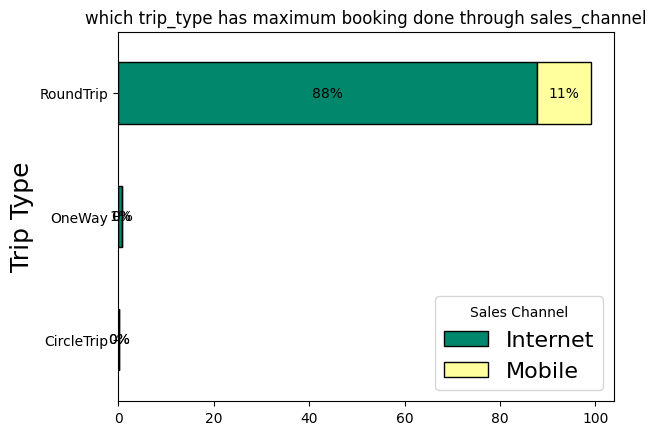

In [73]:
df = data.groupby(["trip_type","sales_channel"])[['sales_channel']].count()

df.rename(columns = {'sales_channel':'count'},inplace=True)
df.reset_index(inplace=True)

df['percentage'] = (df['count']/df['count'].sum())*100

new_df = pd.DataFrame(columns = ['trip_type','Internet','Mobile'])

new_df['trip_type'] = ["CircleTrip","OneWay","RoundTrip"]

new_df.iloc[0,1] = df.iloc[0,3]
new_df.iloc[0,2] = df.iloc[1,3]

new_df.iloc[1,1] = df.iloc[2,3]
new_df.iloc[1,2] = df.iloc[3,3]

new_df.iloc[2,1] = df.iloc[4,3]
new_df.iloc[2,2] = df.iloc[5,3]


plt.figure(figsize=(19, 7))
cvn = new_df.plot(x='trip_type',kind='barh',stacked=True,color = ["#00876c", "#ffff9d"],edgecolor='black')
plt.title("which trip_type has maximum booking done through sales_channel", fontsize=12)
plt.ylabel('Trip Type', fontsize=18)
plt.legend(title="Sales Channel", fontsize=16,loc="lower right")
plt.grid(False)

for i in cvn.patches:
    width = i.get_width()
    height = i.get_height()
    x, y = i.get_xy()
    padding=5
    cvn.text(x + width / 2,
            y + height / 2,
            '{:.0f}%'.format(width),
            horizontalalignment = "center",
            verticalalignment = "center")
plt.show()    

#### 88% peoples have booked round trips through the Internet.

In [37]:
top_1 = data[data['booking_complete'] == 1]
top_0 = data[data['booking_complete'] == 0]

combined = pd.concat([top_1.assign(status='Completed'), top_0.assign(status='Not Completed')])
summary = combined.pivot_table(index='booking_origin', columns='status', aggfunc='size', fill_value=0)

top_origins = data['booking_origin'].value_counts().nlargest(10).index
summary = summary.loc[top_origins]

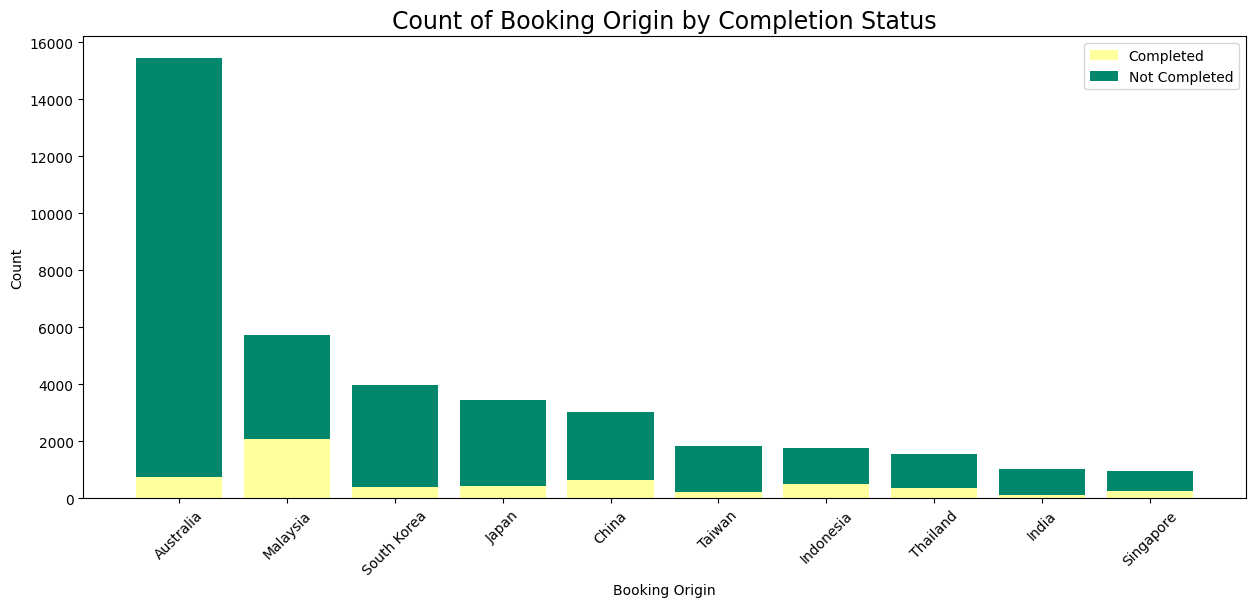

In [38]:
fig, ax = plt.subplots(figsize=(15, 6))

bars1 = ax.bar(summary.index, summary['Completed'], label='Completed', color='#ffff9d')
bars2 = ax.bar(summary.index, summary['Not Completed'], bottom=summary['Completed'], label='Not Completed', color="#00876c")


ax.set_ylabel('Count')
ax.set_xlabel('Booking Origin')
ax.set_title('Count of Booking Origin by Completion Status',fontsize=17)
plt.xticks(rotation=45)
ax.legend()
plt.show()

#### Maximum Booking Not Completed in **Australia** and **Malaysia.** very few booking completed on **Australia** **Malaysia** and other Countries.

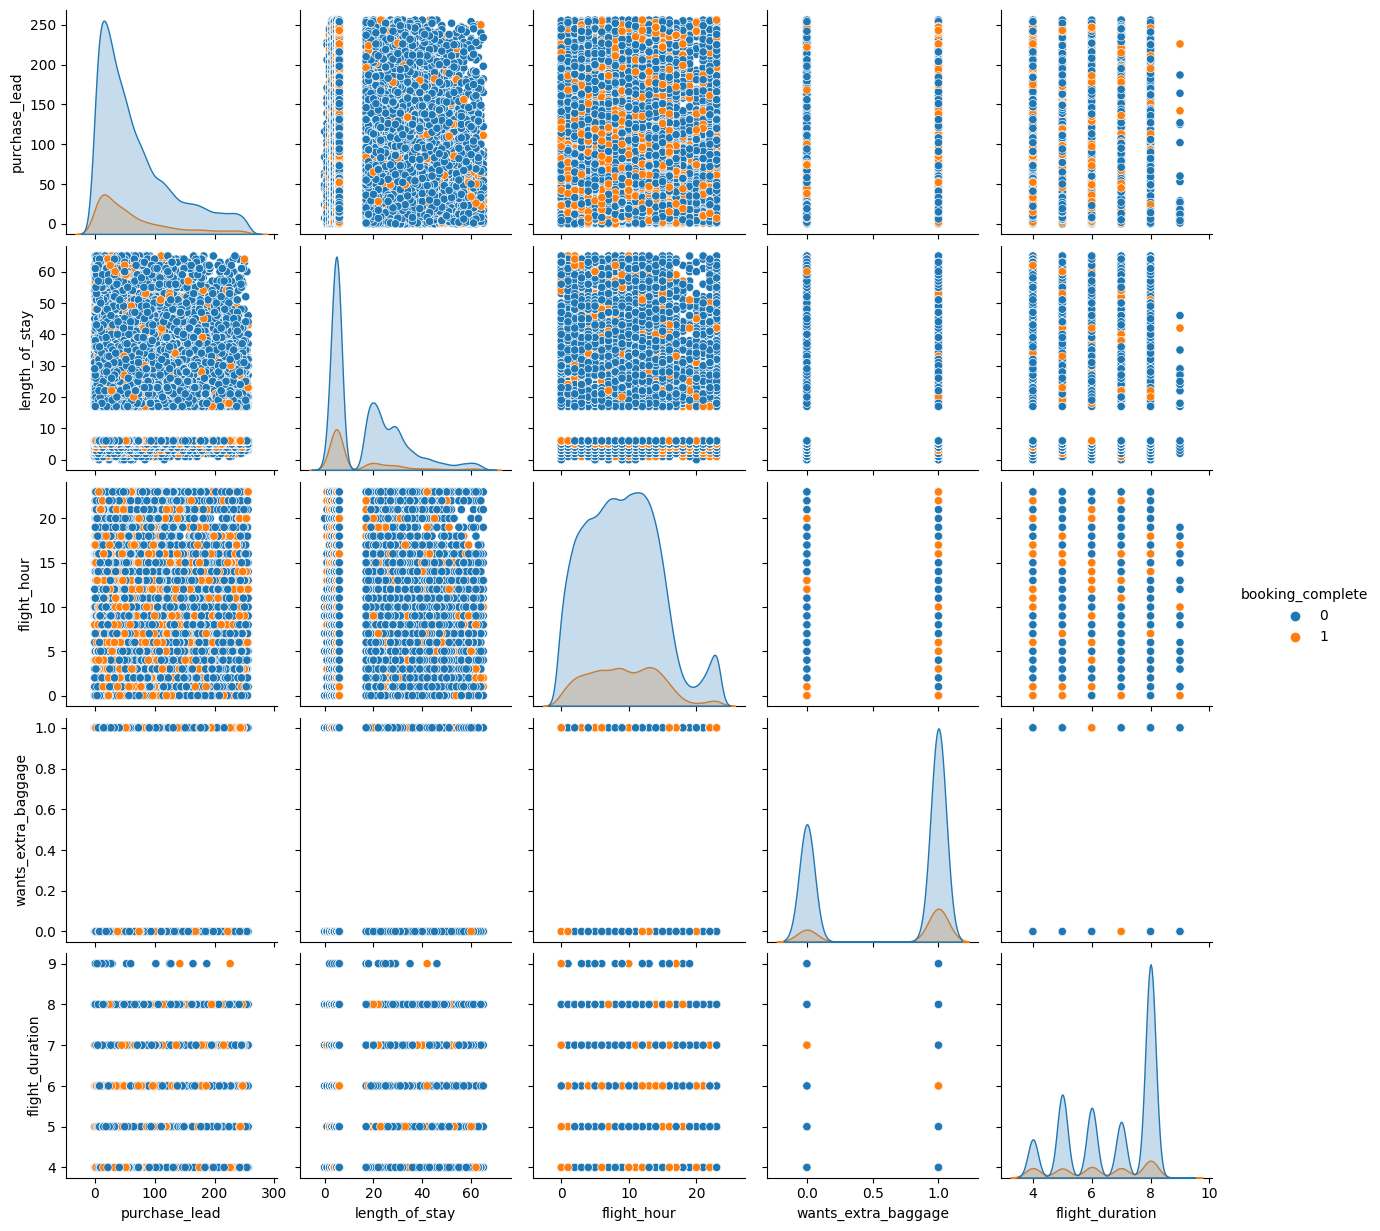

In [39]:
sns.pairplot(data, hue='booking_complete')
plt.show()

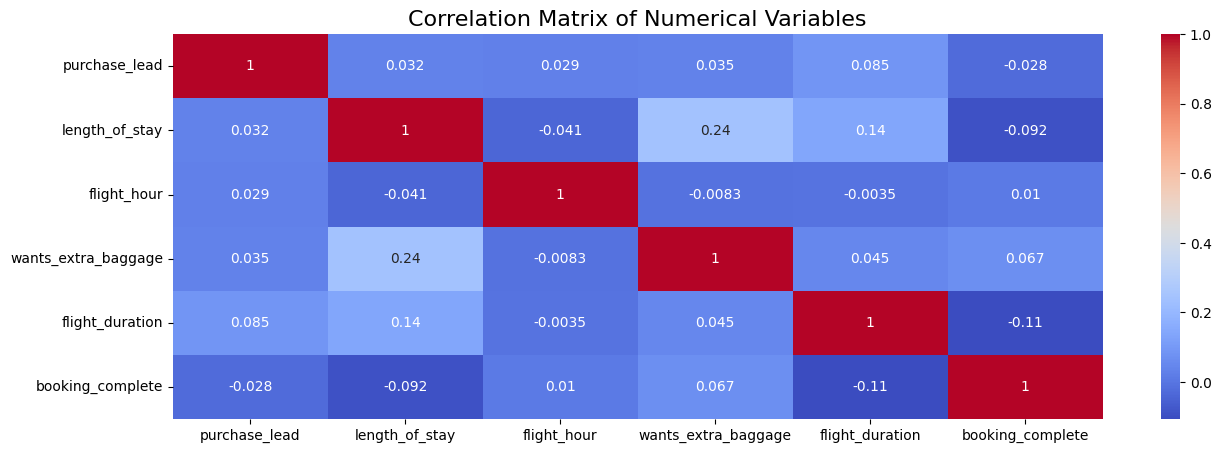

In [41]:
data_numerical = data.select_dtypes(exclude='object')
plt.figure(figsize=(15,5))
sns.heatmap(data_numerical.corr() , annot=True, cmap="coolwarm")
plt.title("Correlation Matrix of Numerical Variables",fontsize=16)
plt.show()

In [16]:
from sklearn.preprocessing import StandardScaler
# from sklearn.preprocessing import OneHotEncoder
# import category_encoders
from collections import Counter
# from category_encoders import TargetEncoder
from sklearn.model_selection import train_test_split, cross_val_score 
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, precision_score, recall_score, roc_auc_score, accuracy_score

In [18]:
for i in data.select_dtypes(include='object'):
    print(f"Value counts for {i}:")
    print(data[i].value_counts())
    print("\n")
    print("\n")

Value counts for sales_channel:
sales_channel
Internet    37520
Mobile       4763
Name: count, dtype: int64




Value counts for trip_type:
trip_type
RoundTrip     41849
OneWay          341
CircleTrip       93
Name: count, dtype: int64




Value counts for route:
route
AKLKUL    1948
PENTPE     837
ICNSIN     743
MELSGN     735
DMKPER     603
          ... 
PERVTE       1
PERSWA       1
MRUSGN       1
MELWUH       1
MRUXIY       1
Name: count, Length: 789, dtype: int64




Value counts for booking_origin:
booking_origin
Australia      15428
Malaysia        5744
South Korea     3969
Japan           3445
China           3025
               ...  
Lebanon            1
Nicaragua          1
Jordan             1
Tanzania           1
Svalbard           1
Name: count, Length: 100, dtype: int64






In [14]:
data.head(2)

,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,route,booking_origin,wants_extra_baggage,flight_duration,booking_complete
1,Internet,RoundTrip,112,20,3,AKLDEL,New Zealand,0,5,0
2,Internet,RoundTrip,243,22,17,AKLDEL,India,1,5,0


In [27]:
print("Number of Unique values of route variable is {}".format(len(data.route.unique())))
print("<>__<>"*10)
data.route.unique()

Number of Unique values of route variable is 789
<>__<><>__<><>__<><>__<><>__<><>__<><>__<><>__<><>__<><>__<>


array(['AKLDEL', 'AKLHND', 'AKLICN', 'AKLKIX', 'AKLKTM', 'AKLKUL',
       'AKLMRU', 'AKLPEK', 'AKLPVG', 'AKLTPE', 'AORICN', 'AORKIX',
       'AORKTM', 'AORMEL', 'BBIMEL', 'BBIOOL', 'BBIPER', 'BBISYD',
       'BDOCTU', 'BDOHGH', 'BDOICN', 'BDOIKA', 'BDOKIX', 'BDOMEL',
       'BDOOOL', 'BDOPEK', 'BDOPER', 'BDOPUS', 'BDOPVG', 'BDOSYD',
       'BDOTPE', 'BDOXIY', 'BKICKG', 'BKICTS', 'BKICTU', 'BKIHND',
       'BKIICN', 'BKIKIX', 'BKIKTM', 'BKIMEL', 'BKIMRU', 'BKIOOL',
       'BKIPEK', 'BKIPER', 'BKIPUS', 'BKIPVG', 'BKISYD', 'BKIXIY',
       'BLRICN', 'BLRMEL', 'BLRPER', 'BLRSYD', 'BOMMEL', 'BOMOOL',
       'BOMPER', 'BOMSYD', 'BTJJED', 'BTUICN', 'BTUPER', 'BTUWUH',
       'BWNCKG', 'BWNDEL', 'BWNHGH', 'BWNIKA', 'BWNKTM', 'BWNMEL',
       'BWNOOL', 'BWNPER', 'BWNSYD', 'BWNTPE', 'CANDEL', 'CANIKA',
       'CANMEL', 'CANMRU', 'CANOOL', 'CANPER', 'CANSYD', 'CCUMEL',
       'CCUMRU', 'CCUOOL', 'CCUPER', 'CCUSYD', 'CCUTPE', 'CEBMEL',
       'CEBOOL', 'CEBPER', 'CEBSYD', 'CGKCKG', 'CGKCTS', 'CGKC

In [19]:
location_stats = data.groupby('route')['route'].agg('count').sort_values(ascending=True)
print(location_stats.nlargest(50))

route
AKLKUL    1948
PENTPE     837
ICNSIN     743
MELSGN     735
DMKPER     603
DPSICN     595
DMKKIX     591
ICNSYD     582
DMKOOL     559
MELTPE     548
MELPEN     522
SGNSYD     511
DMKSYD     449
COKSYD     441
CMBMEL     404
COKMEL     391
HNDPEN     376
PENPER     371
DPSPVG     363
HKTICN     341
CGKICN     323
PERSGN     319
HKTSYD     317
JHBKTM     315
PENSYD     308
DMKMEL     306
HKTPER     306
DPSKIX     305
COKPER     298
CGKHND     290
CMBSYD     285
DPSHND     278
ICNPER     273
KTMMFM     270
HNDSIN     268
PERTPE     267
ICNPEN     266
ICNMEL     258
CTSDMK     252
DMKICN     251
KIXSIN     248
CGKKIX     247
HKTOOL     245
OOLSGN     239
DPSPEK     237
PENPVG     233
KTMPEN     226
HYDSYD     218
HNDPER     211
HKTKIX     210
Name: route, dtype: int64


In [29]:
location_stats.values.sum()

42283

In [87]:
len(data.route)

42283

In [18]:
len(location_stats[location_stats<=20])

434

# Dimensionality Reduction

#### Any route having less than 10 data points should be tagged as "other" route. This way number of categories can be reduced by huge amount. Later on when we do one hot encoding, it will help us with having fewer dummy columns

In [20]:
location_stats_less_20 = location_stats[location_stats <= 20]
print(location_stats_less_20.nlargest(50))

route
CNXICN    20
KLOMEL    20
LOPPEK    20
MELXIY    20
KNOPVG    20
HNDPNH    20
OOLVTE    20
CGKIKA    20
DACOOL    20
HGHMEL    20
MYYSYD    19
BDOPER    19
CRKMEL    19
SBWSYD    19
JHBXIY    19
HNDSBW    19
CTUTGG    19
GOIPER    18
KIXSBW    18
MYYOOL    18
CTSPER    18
KCHXIY    18
MRUPER    18
KIXMAA    18
DELSUB    18
SINXIY    18
HNDKBV    18
DMKMRU    18
JOGMEL    18
HGHSYD    18
PEKTRZ    17
KIXLOP    17
HGHOOL    17
IKAMNL    17
CTUPER    17
CTUJHB    17
BDOMEL    17
LGKOOL    17
JOGSYD    17
KBVKIX    17
BWNOOL    17
COKCTU    17
BKIXIY    17
BOMSYD    17
MELMFM    17
KIXMLE    17
KIXLPQ    16
PNKTPE    16
ICNVTZ    16
RGNTPE    16
Name: route, dtype: int64


In [34]:
len(data.route.unique())

789

In [21]:
# https://stackoverflow.com/questions/39109045/numpy-where-with-multiple-conditions
# data['route'] = np.where(data['route'].map(location_stats) <= 10, 'other', data['route'])
data.route = data.route.apply(lambda x: 'other' if x in location_stats_less_20 else x)

len(data.route.unique())

356

In [33]:
data.sample(10)

,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,route,booking_origin,wants_extra_baggage,flight_duration,booking_complete
28248,Internet,RoundTrip,39,3,6,ICNSYD,South Korea,0,8,0
42933,Internet,RoundTrip,1,6,4,BTUICN,Malaysia,1,6,0
33863,Internet,RoundTrip,55,4,7,MELSGN,Vietnam,0,8,0
41252,Internet,RoundTrip,39,5,8,PEKTGG,China,1,6,1
45835,Internet,RoundTrip,57,6,13,DPSSYD,Australia,0,8,0
47300,Internet,RoundTrip,105,6,16,ICNPEN,China,1,6,1
10254,Internet,RoundTrip,103,37,9,DMKSYD,Australia,1,8,0
17756,Internet,RoundTrip,10,64,10,KTMPEN,Malaysia,1,4,1
7120,Internet,RoundTrip,41,28,0,COKSYD,Australia,1,8,0
48681,Internet,RoundTrip,8,6,3,LGKSYD,Australia,1,8,0


## We will perform same task with **booking_origin** as we perfromed in **route** Feature.

In [22]:
data.booking_origin.value_counts()

booking_origin
Australia      15428
Malaysia        5744
South Korea     3969
Japan           3445
China           3025
               ...  
Lebanon            1
Nicaragua          1
Jordan             1
Tanzania           1
Svalbard           1
Name: count, Length: 100, dtype: int64

In [23]:
origin = data.groupby('booking_origin')['booking_origin'].agg('count').sort_values(ascending=False)
origin.nlargest(60)

booking_origin
Australia               15428
Malaysia                 5744
South Korea              3969
Japan                    3445
China                    3025
Taiwan                   1821
Indonesia                1766
Thailand                 1562
India                    1030
Singapore                 971
New Zealand               796
United States             413
Vietnam                   301
Macau                     291
Hong Kong                 240
Philippines               194
United Kingdom            158
Brunei                    142
Cambodia                  114
Sri Lanka                  64
Canada                     54
France                     52
Italy                      49
Germany                    47
Myanmar                    43
Netherlands                42
Mauritius                  38
United Arab Emirates       38
Nepal                      36
Bangladesh                 30
Russia                     30
Saudi Arabia               28
Spain                    

In [35]:
len(origin[origin<=15])

65

In [24]:
origin_less_15 = origin[origin <= 15]
print(origin_less_15.nlargest(50))

booking_origin
Qatar              15
Iran               13
Chile              13
Sweden             11
Kuwait              9
Brazil              9
Runion             9
Austria             8
Mexico              8
Turkey              8
Oman                8
Mongolia            7
Poland              7
Maldives            7
Finland             7
Czech Republic      7
Ireland             7
Denmark             6
Argentina           6
Portugal            5
Belgium             5
Norway              5
Greece              5
New Caledonia       4
Ukraine             4
Peru                4
Bahrain             4
Hungary             3
Kazakhstan          3
Kenya               3
South Africa        3
Colombia            3
Romania             3
Cyprus              2
Croatia             2
Timor-Leste         2
Guam                2
Israel              2
Solomon Islands     2
Tanzania            1
Bulgaria            1
Tunisia             1
Belarus             1
Svalbard            1
Czechia          

In [25]:
len(data.booking_origin.unique())

100

In [26]:
print(len(origin_less_15))

65


In [27]:
data['booking_origin'] = data['booking_origin'].apply(lambda y: 'other' if y in origin_less_15 else y)

len(data.booking_origin.unique())

36

In [39]:
data.sample(10)

,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,route,booking_origin,wants_extra_baggage,flight_duration,booking_complete
43242,Internet,RoundTrip,72,6,8,CGKICN,South Korea,1,6,0
96,Internet,RoundTrip,138,35,19,AKLKUL,Switzerland,1,8,0
49906,Internet,RoundTrip,28,6,9,PENTPE,Malaysia,1,4,0
32629,Internet,RoundTrip,5,4,11,ICNLGK,South Korea,0,6,0
16582,Internet,CircleTrip,26,17,11,KIXOOL,Japan,0,8,0
5207,Internet,RoundTrip,98,19,12,CMBPER,Australia,1,5,0
43684,Internet,RoundTrip,228,6,16,other,South Korea,0,6,0
11800,Internet,RoundTrip,25,20,8,HKTMEL,Australia,1,8,0
20969,Internet,RoundTrip,12,25,13,MELVTZ,Australia,1,8,0
34132,Internet,RoundTrip,111,4,12,PENPER,Hong Kong,1,5,0


In [44]:
data.route.value_counts()

route
other     3061
AKLKUL    1948
PENTPE     837
ICNSIN     743
MELSGN     735
          ... 
CANMEL      21
PERSZX      21
BDOSYD      21
CCUOOL      21
DELHKT      21
Name: count, Length: 356, dtype: int64

In [45]:
data.booking_origin.value_counts()

booking_origin
Australia               15428
Malaysia                 5744
South Korea              3969
Japan                    3445
China                    3025
Taiwan                   1821
Indonesia                1766
Thailand                 1562
India                    1030
Singapore                 971
New Zealand               796
United States             413
Vietnam                   301
Macau                     291
other                     257
Hong Kong                 240
Philippines               194
United Kingdom            158
Brunei                    142
Cambodia                  114
Sri Lanka                  64
Canada                     54
France                     52
Italy                      49
Germany                    47
Myanmar                    43
Netherlands                42
Mauritius                  38
United Arab Emirates       38
Nepal                      36
Russia                     30
Bangladesh                 30
Saudi Arabia             

### **Encode the Feature into Numeric**

In [28]:
data

,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,route,booking_origin,wants_extra_baggage,flight_duration,booking_complete
1,Internet,RoundTrip,112,20,3,other,New Zealand,0,5,0
2,Internet,RoundTrip,243,22,17,other,India,1,5,0
3,Internet,RoundTrip,96,31,4,other,New Zealand,0,5,0
4,Internet,RoundTrip,68,22,15,other,India,1,5,0
5,Internet,RoundTrip,3,48,20,other,New Zealand,1,5,0
...,...,...,...,...,...,...,...,...,...,...
49995,Internet,RoundTrip,27,6,9,PERPNH,Australia,1,5,0
49996,Internet,RoundTrip,111,6,4,PERPNH,Australia,0,5,0
49997,Internet,RoundTrip,24,6,22,PERPNH,Australia,0,5,0
49998,Internet,RoundTrip,15,6,11,PERPNH,Australia,1,5,0


In [29]:
Counter(data['booking_complete'])

Counter({0: 35899, 1: 6384})

In [30]:
dummies = pd.get_dummies(data[['sales_channel','trip_type']])

In [31]:
dummies

,sales_channel_Internet,sales_channel_Mobile,trip_type_CircleTrip,trip_type_OneWay,trip_type_RoundTrip
1,True,False,False,False,True
2,True,False,False,False,True
3,True,False,False,False,True
4,True,False,False,False,True
5,True,False,False,False,True
...,...,...,...,...,...
49995,True,False,False,False,True
49996,True,False,False,False,True
49997,True,False,False,False,True
49998,True,False,False,False,True


In [32]:
dummie2 = pd.get_dummies(data[['route','booking_origin']])

In [33]:
dummie2.columns

Index(['route_AKLICN', 'route_AKLKUL', 'route_AKLTPE', 'route_AORMEL',
       'route_BDOHGH', 'route_BDOICN', 'route_BDOKIX', 'route_BDOSYD',
       'route_BKICTS', 'route_BKICTU',
       ...
       'booking_origin_Spain', 'booking_origin_Sri Lanka',
       'booking_origin_Switzerland', 'booking_origin_Taiwan',
       'booking_origin_Thailand', 'booking_origin_United Arab Emirates',
       'booking_origin_United Kingdom', 'booking_origin_United States',
       'booking_origin_Vietnam', 'booking_origin_other'],
      dtype='object', length=392)

In [34]:
dummie2.drop('booking_origin_other',axis=1,inplace=True)
dummie2.drop('route_other',axis=1,inplace=True)

In [35]:
df = pd.concat([data,dummies,dummie2],axis=1)

In [36]:
df.drop(columns=['sales_channel','trip_type','route','booking_origin'],axis=1,inplace=True)

In [37]:
df

,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,flight_duration,booking_complete,sales_channel_Internet,sales_channel_Mobile,trip_type_CircleTrip,trip_type_OneWay,...,booking_origin_South Korea,booking_origin_Spain,booking_origin_Sri Lanka,booking_origin_Switzerland,booking_origin_Taiwan,booking_origin_Thailand,booking_origin_United Arab Emirates,booking_origin_United Kingdom,booking_origin_United States,booking_origin_Vietnam
1,112,20,3,0,5,0,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,243,22,17,1,5,0,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,96,31,4,0,5,0,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,68,22,15,1,5,0,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,3,48,20,1,5,0,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,27,6,9,1,5,0,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
49996,111,6,4,0,5,0,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
49997,24,6,22,0,5,0,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
49998,15,6,11,1,5,0,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Counter({0: 35899, 1: 6384})


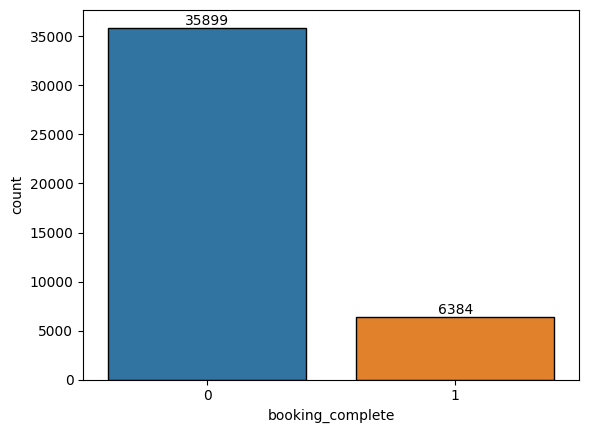

In [38]:
print(Counter(df['booking_complete']))
acv = sns.countplot(data=df, x="booking_complete",edgecolor='black')
acv.bar_label(acv.containers[0], fontsize=10)
plt.show()

In [39]:
X = df.drop(["booking_complete"], axis=1)
y = df["booking_complete"]

In [40]:
X

,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,flight_duration,sales_channel_Internet,sales_channel_Mobile,trip_type_CircleTrip,trip_type_OneWay,trip_type_RoundTrip,...,booking_origin_South Korea,booking_origin_Spain,booking_origin_Sri Lanka,booking_origin_Switzerland,booking_origin_Taiwan,booking_origin_Thailand,booking_origin_United Arab Emirates,booking_origin_United Kingdom,booking_origin_United States,booking_origin_Vietnam
1,112,20,3,0,5,True,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
2,243,22,17,1,5,True,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
3,96,31,4,0,5,True,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
4,68,22,15,1,5,True,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
5,3,48,20,1,5,True,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,27,6,9,1,5,True,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
49996,111,6,4,0,5,True,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
49997,24,6,22,0,5,True,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
49998,15,6,11,1,5,True,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


In [41]:
X.shape

(42283, 400)

In [42]:
Counter(y)

Counter({0: 35899, 1: 6384})

### **Handel Imbalance Data with **SMOTE** but We can use different technique like **SMOTEENN,** **Class Weight** and more.

In [43]:
sm = SMOTE()

X,y = sm.fit_resample(X,y)

### **Feature Scaling**

In [44]:
sc = StandardScaler()

X_scaled = sc.fit_transform(X)

In [45]:
Counter(y)

Counter({0: 35899, 1: 35899})

In [36]:
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

In [37]:
X_scaled.columns

Index(['purchase_lead', 'length_of_stay', 'flight_hour', 'wants_extra_baggage',
       'flight_duration', 'sales_channel_Internet', 'sales_channel_Mobile',
       'trip_type_CircleTrip', 'trip_type_OneWay', 'trip_type_RoundTrip',
       ...
       'booking_origin_South Korea', 'booking_origin_Spain',
       'booking_origin_Sri Lanka', 'booking_origin_Switzerland',
       'booking_origin_Taiwan', 'booking_origin_Thailand',
       'booking_origin_United Arab Emirates', 'booking_origin_United Kingdom',
       'booking_origin_United States', 'booking_origin_Vietnam'],
      dtype='object', length=400)

In [160]:
X_scaled.head()

,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,flight_duration,sales_channel_Internet,sales_channel_Mobile,trip_type_CircleTrip,trip_type_OneWay,trip_type_RoundTrip,...,booking_origin_South Korea,booking_origin_Spain,booking_origin_Sri Lanka,booking_origin_Switzerland,booking_origin_Taiwan,booking_origin_Thailand,booking_origin_United Arab Emirates,booking_origin_United Kingdom,booking_origin_United States,booking_origin_Vietnam
0,0.732189,0.356986,-1.141701,-1.309656,-0.95697,0.362453,-0.279255,-0.036014,-0.069284,0.089536,...,-0.25785,-0.019033,-0.029869,-0.01493,-0.171526,-0.164157,-0.023012,-0.046962,-0.076708,-0.066488
1,2.826591,0.495714,1.529355,0.763559,-0.95697,0.362453,-0.279255,-0.036014,-0.069284,0.089536,...,-0.25785,-0.019033,-0.029869,-0.01493,-0.171526,-0.164157,-0.023012,-0.046962,-0.076708,-0.066488
2,0.476384,1.119990,-0.950911,-1.309656,-0.95697,0.362453,-0.279255,-0.036014,-0.069284,0.089536,...,-0.25785,-0.019033,-0.029869,-0.01493,-0.171526,-0.164157,-0.023012,-0.046962,-0.076708,-0.066488
3,0.028726,0.495714,1.147775,0.763559,-0.95697,0.362453,-0.279255,-0.036014,-0.069284,0.089536,...,-0.25785,-0.019033,-0.029869,-0.01493,-0.171526,-0.164157,-0.023012,-0.046962,-0.076708,-0.066488
4,-1.010481,2.299180,2.101724,0.763559,-0.95697,0.362453,-0.279255,-0.036014,-0.069284,0.089536,...,-0.25785,-0.019033,-0.029869,-0.01493,-0.171526,-0.164157,-0.023012,-0.046962,-0.076708,-0.066488


In [38]:
from sklearn.decomposition import PCA
pca = PCA()
X_new = pca.fit_transform(X_scaled)

In [39]:
X_new.shape

(71798, 400)

In [40]:
explained_variance = pca.explained_variance_ratio_
len(explained_variance)

400

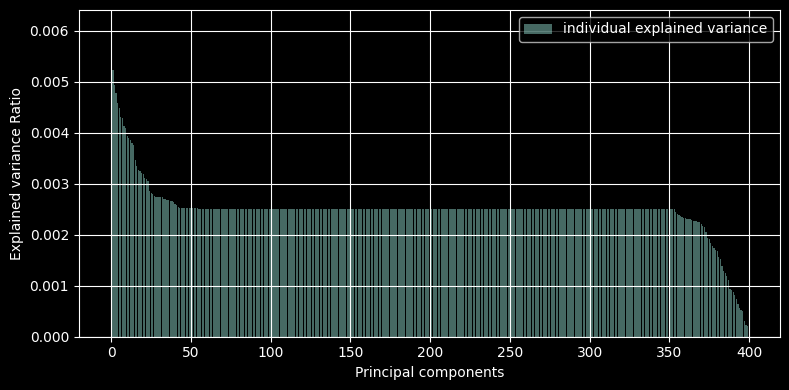

In [163]:
with plt.style.context("dark_background"):
    plt.figure(figsize=(8,4))
    
    
    plt.bar(range(400), explained_variance, alpha=0.5, align='center',label='individual explained variance')
    plt.ylabel("Explained variance Ratio")
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.grid(True)
    plt.tight_layout()

In [164]:
def var_explained():
    import numpy as np
    from matplotlib.pyplot import figure, show
    from matplotlib.ticker import MaxNLocator
    
    ax = figure().gca()
    ax.plot(np.cumsum(pca.explained_variance_ratio_))
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    plt.xlabel('Number of Components')
    plt.ylabel('Cumulative Explained Variance')
    plt.grid(True)
    plt.axvline(x=1, linewidth=1, color='r', alpha=0.5)
    plt.title('Explained Variance of PCA by Component')
    show()

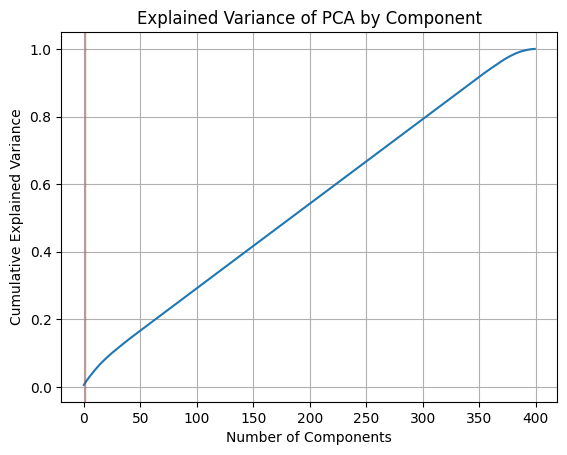

In [165]:
var_explained()

In [41]:
loadings = pca.components_
loadings

array([[ 6.64599198e-02,  2.75626787e-01, -2.27104513e-02, ...,
         8.04688730e-03, -1.55966615e-02,  4.45030761e-02],
       [-8.30263577e-02,  2.52588167e-01, -7.92265307e-02, ...,
        -2.08511597e-03, -6.57994220e-03, -1.47778173e-04],
       [ 1.67769202e-02, -6.22540358e-02, -8.18355824e-04, ...,
         1.06180118e-02,  1.66996067e-02, -2.02062427e-02],
       ...,
       [-2.41508818e-03, -2.84679733e-03,  3.16211577e-03, ...,
         3.35257494e-03,  7.24036946e-03,  3.53187873e-03],
       [ 1.45912174e-02,  1.06418642e-03,  5.82479530e-03, ...,
         4.44232973e-02,  6.56177163e-02,  7.33410743e-02],
       [-1.23640606e-03, -2.52253019e-03, -1.78498123e-03, ...,
        -1.58532357e-02, -2.51357508e-02, -2.56645240e-02]])

In [42]:
pca = PCA(n_components=30)
X_new = pca.fit_transform(X_new)

In [168]:
X_new.shape

(71798, 30)

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size = 0.3, random_state=20, stratify=y)

In [44]:
X_train

array([[-1.70606764, -4.38700477, -2.20715586, ...,  0.07388189,
        -0.22934724,  0.34635042],
       [-0.84121368, -2.15185811, -0.85559177, ..., -0.70097563,
        -0.52671652,  0.29034558],
       [ 2.7476013 ,  0.28671222, -0.20517135, ...,  0.10402271,
        -0.77590624,  1.11300075],
       ...,
       [-0.79367476,  1.3604556 ,  0.45238798, ...,  0.80267646,
         0.65302386,  0.17140589],
       [ 2.1347894 ,  0.3392449 , -0.27991518, ..., -0.06960136,
        -0.07324503, -0.02795013],
       [-0.86547947,  1.54522135, -0.03878256, ...,  0.14201939,
        -0.01983411,  0.05387016]])

In [45]:
from sklearn.ensemble import RandomForestClassifier

clf=RandomForestClassifier()

In [46]:
clf.fit(X_train,y_train)

RandomForestClassifier()

In [47]:
print("Train score Before using GridSearchCV",clf.score(X_train,y_train),"%")
print("Test score Before using GridSearchCV",clf.score(X_test,y_test),"%")

Train score Before using GridSearchCV 0.999482669425763 %
Test score Before using GridSearchCV 0.8858402971216341 %


In [50]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [1, 2, 4]
}



grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=1, scoring='accuracy')

In [51]:
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 5, 10],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [5, 10],
                         'n_estimators': [100, 200]},
             scoring='accuracy', verbose=1)

In [52]:
pd.DataFrame(grid_search.cv_results_).iloc[:,4:].sort_values(by='rank_test_score')

,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
10,None,4,10,100,"{'max_depth': None, 'min_samples_leaf': 4, 'mi...",0.890885,0.886767,0.888073,0.888575,0.001718,1
8,None,4,5,100,"{'max_depth': None, 'min_samples_leaf': 4, 'mi...",0.889990,0.887304,0.887894,0.888396,0.001153,2
9,None,4,5,200,"{'max_depth': None, 'min_samples_leaf': 4, 'mi...",0.890109,0.886229,0.888372,0.888237,0.001587,3
11,None,4,10,200,"{'max_depth': None, 'min_samples_leaf': 4, 'mi...",0.891602,0.885215,0.887834,0.888217,0.002621,4
2,None,1,10,100,"{'max_depth': None, 'min_samples_leaf': 1, 'mi...",0.889632,0.885453,0.886939,0.887341,0.001729,5
7,None,2,10,200,"{'max_depth': None, 'min_samples_leaf': 2, 'mi...",0.889094,0.886289,0.886640,0.887341,0.001248,6
3,None,1,10,200,"{'max_depth': None, 'min_samples_leaf': 1, 'mi...",0.889154,0.884856,0.887058,0.887023,0.001755,7
4,None,2,5,100,"{'max_depth': None, 'min_samples_leaf': 2, 'mi...",0.888915,0.884737,0.887357,0.887003,0.001724,8
6,None,2,10,100,"{'max_depth': None, 'min_samples_leaf': 2, 'mi...",0.890467,0.884379,0.886103,0.886983,0.002562,9
5,None,2,5,200,"{'max_depth': None, 'min_samples_leaf': 2, 'mi...",0.889274,0.884140,0.886461,0.886625,0.002099,10


In [53]:
# Finding the best_estimator
best_estimator = grid_search.best_estimator_
print("\nThe best_estimator is: {}".format(best_estimator))

# Finding The best_parameter
best_parameter = grid_search.best_params_
print(f"\nBest Model Parameters: {best_parameter}")


The best_estimator is: RandomForestClassifier(min_samples_leaf=4, min_samples_split=10)

Best Model Parameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}


In [54]:
# Finding the best_score_
best_score = grid_search.best_score_
print("\nBest Score: ",best_score)


Best Score:  0.8885749432552559


In [58]:
y_preds = best_estimator.predict(X_test)
print("Test accuracy:", accuracy_score(y_test, y_preds))

Test accuracy: 0.8876044568245125


In [59]:
# Get the predicted probabilities for the positive class
y_probs = clf.predict_proba(X_test)[:, 1]
y_probs

array([0.34, 0.07, 0.02, ..., 0.06, 1.  , 1.  ])

In [60]:
# Calculate the AUC score
auc_score = roc_auc_score(y_test, y_probs)
print(f"AUC Score: {auc_score}")

AUC Score: 0.9484841054926638


In [61]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_preds)

In [112]:
# ROc = metrics.roc_curve(y_test, y_preds)
# print(f"ROC Score: {ROc}")

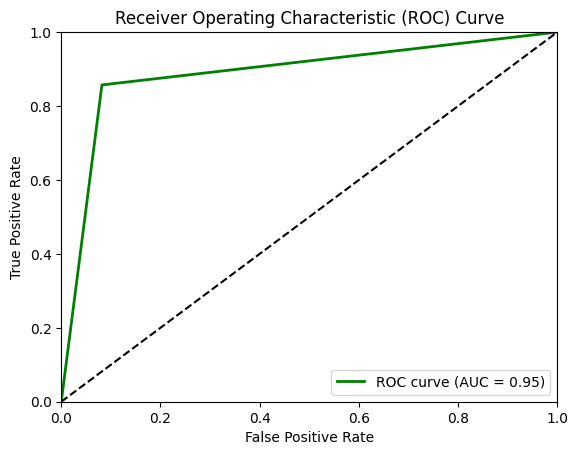

In [62]:
plt.figure()
plt.plot(fpr, tpr, color='green', lw=2, label=f'ROC curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [63]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.87      0.92      0.89     10770
           1       0.91      0.86      0.88     10770

    accuracy                           0.89     21540
   macro avg       0.89      0.89      0.89     21540
weighted avg       0.89      0.89      0.89     21540



In [64]:
cm = confusion_matrix(y_test, y_preds)
cm

array([[9888,  882],
       [1539, 9231]])

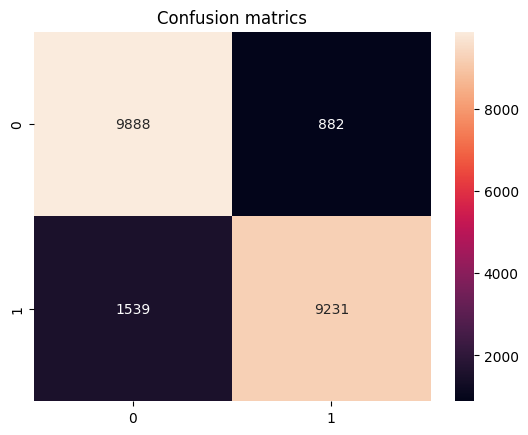

In [65]:
sns.heatmap(cm, annot=True, fmt="d")
plt.title("Confusion matrics")
plt.show()

In [66]:
clf = RandomForestClassifier(max_depth= None, min_samples_leaf= 4, min_samples_split=5, n_estimators=200)

In [67]:
clf.fit(X_train,y_train)

RandomForestClassifier(min_samples_leaf=4, min_samples_split=5,
                       n_estimators=200)

In [68]:
y_probs = clf.predict_proba(X_test)[:, 1]
y_probs

array([0.28939681, 0.07870152, 0.02526496, ..., 0.15767415, 1.        ,
       1.        ])

In [69]:
# Calculate the AUC score
auc_score = roc_auc_score(y_test, y_probs)
print(f"AUC Score: {auc_score}")

AUC Score: 0.9517170749244136


In [70]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_preds)

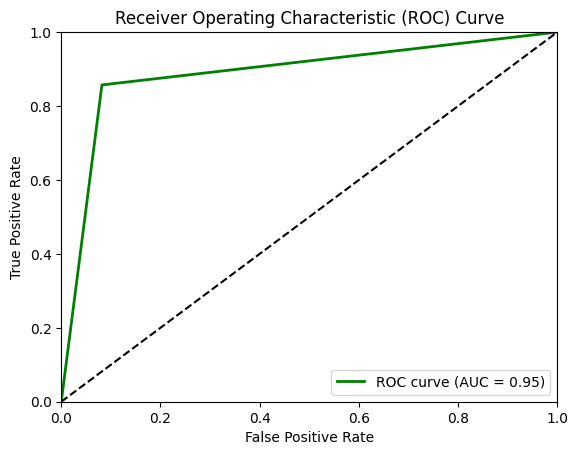

In [71]:
plt.figure()
plt.plot(fpr, tpr, color='green', lw=2, label=f'ROC curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [72]:
y_predict = clf.predict(X_test)

In [73]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.87      0.92      0.89     10770
           1       0.91      0.86      0.88     10770

    accuracy                           0.89     21540
   macro avg       0.89      0.89      0.89     21540
weighted avg       0.89      0.89      0.89     21540



In [74]:
c_m = confusion_matrix(y_test, y_predict)
c_m

array([[9887,  883],
       [1524, 9246]])

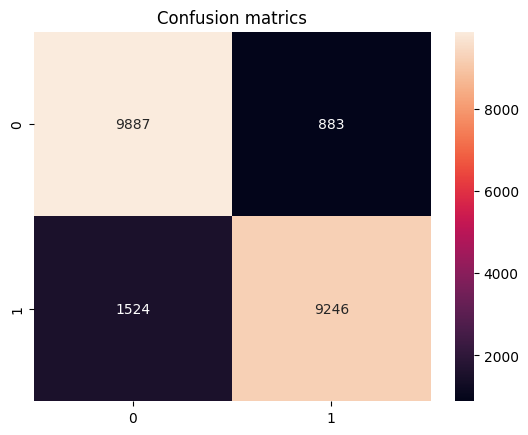

In [75]:
sns.heatmap(c_m, annot=True, fmt="d")
plt.title("Confusion matrics")
plt.show()

In [76]:
print("Test accuracy:", accuracy_score(y_test, y_predict))

Test accuracy: 0.8882544103992572


Calculating the Precision and Recall rach Classes

In [77]:
# calculating Precision and Recall of class 0
precision_class_0 = precision_score(y_test, y_predict, pos_label=0)
recall_class_0 = recall_score(y_test, y_predict, pos_label=0)

In [78]:
print(precision_class_0)
print(recall_class_0)

0.8664446586626939
0.9180129990714949


In [79]:
# calculating Precision Recall of class 1
precision_class_1 = precision_score(y_test, y_predict, pos_label=1)
recall_class_1 = recall_score(y_test, y_predict, pos_label=1)

In [81]:
print(precision_class_1)
print(recall_class_1)

0.9128245631355514
0.8584958217270195


In [82]:
print(f"Class 0 - Precision: {precision_class_0}, Recall: {recall_class_0}")
print(f"Class 1 - Precision: {precision_class_1}, Recall: {recall_class_1}")

Class 0 - Precision: 0.8664446586626939, Recall: 0.9180129990714949
Class 1 - Precision: 0.9128245631355514, Recall: 0.8584958217270195


#### Calculating the **Precision** and **Recall** both **Classes**

In [84]:
# Calculate precision
precision = precision_score(y_test, y_predict)

# Calculate recall
recall = recall_score(y_test, y_predict)

# Print the results
print("Precision:", precision)
print("Recall:", recall)

Precision: 0.9128245631355514
Recall: 0.8584958217270195


In [83]:
feature_importance = clf.feature_importances_
feature_importance

array([0.05928691, 0.01580008, 0.02627756, 0.06126083, 0.02121168,
       0.12786785, 0.02066367, 0.01858651, 0.01201274, 0.01495195,
       0.01458553, 0.01660296, 0.0259584 , 0.02108658, 0.01793671,
       0.05399811, 0.04404842, 0.01267103, 0.01487525, 0.03813599,
       0.01275627, 0.01486251, 0.02137708, 0.00960997, 0.02692313,
       0.06685264, 0.07161862, 0.02245079, 0.05328136, 0.06244886])

In [205]:
feature_importance = clf.feature_importances_

importance_df = pd.DataFrame({'Features':X.iloc[:, :30].columns, 'Importance': feature_importance})

importance_df

,Features,Importance
0,purchase_lead,0.062412
1,length_of_stay,0.016517
2,flight_hour,0.023124
3,wants_extra_baggage,0.044389
4,flight_duration,0.015929
5,sales_channel_Internet,0.128237
6,sales_channel_Mobile,0.024689
7,trip_type_CircleTrip,0.016417
8,trip_type_OneWay,0.019897
9,trip_type_RoundTrip,0.014784


In [206]:
sorted_feature = importance_df.sort_values(by='Importance', ascending=True)

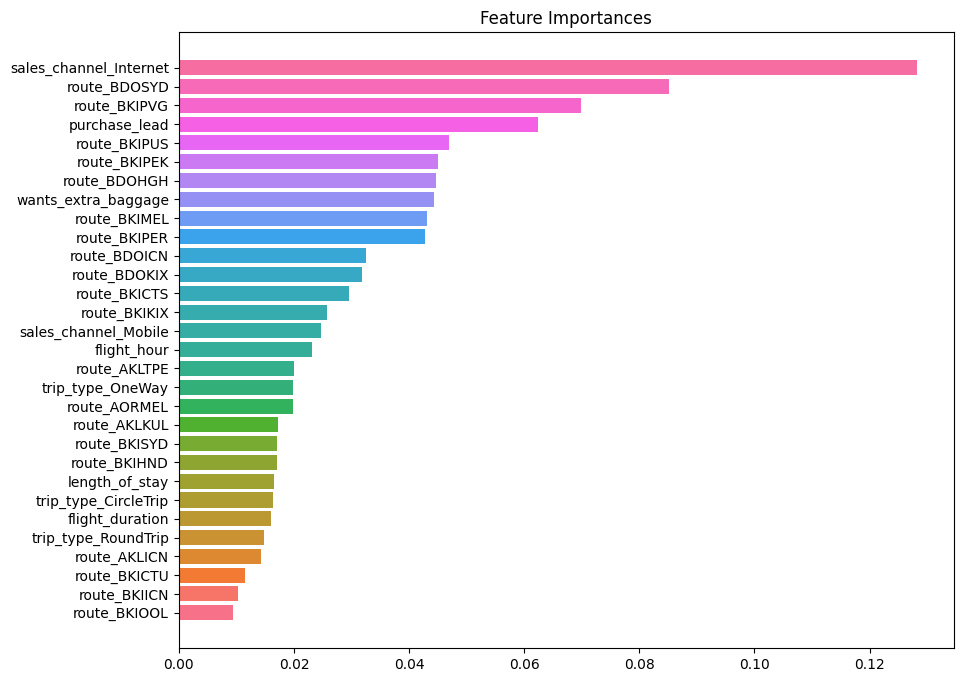

In [277]:
# Generate a palette of 30 colors
palette = sns.color_palette("husl", 30)

plt.figure(figsize=(10,8))
plt.barh(sorted_feature['Features'], sorted_feature['Importance'],color = palette)
plt.title("Feature Importances")
plt.show()

In [268]:
# finding the top 10 importance Features
top_10_features = importance_df.nlargest(10, 'Importance')
top_10_features

,Features,Importance
5,sales_channel_Internet,0.128237
17,route_BDOSYD,0.085186
28,route_BKIPVG,0.069915
0,purchase_lead,0.062412
27,route_BKIPUS,0.046855
25,route_BKIPEK,0.045002
14,route_BDOHGH,0.044756
3,wants_extra_baggage,0.044389
23,route_BKIMEL,0.043036
26,route_BKIPER,0.042722
